In [1]:
import opendatasets as od
import warnings
warnings.filterwarnings("ignore")
import sys
import six
sys.modules['sklearn.externals.six'] = six 

# Preparatory Data Analysis
# Data Science Tools
import pandas as pd
pd.set_option('display.max_columns', None) #show all columns in the dataframe
import numpy as np

# Exploratory Data Analysis
# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data Modelling
# Scikit-Learn Tools
import functools
from itertools import combinations
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb

plt.style.use("fivethirtyeight")
%matplotlib inline


In [6]:
df = pd.read_excel("covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821

In [8]:
# A Code part from Notebook of Caglar Subası
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    import psutil
    import os
    import gc
    import time
    import seaborn as sns
    from IPython.display import display, HTML
    # pd.set_option('display.max_colwidth', -1)
    from io import BytesIO
    import base64

    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    variable_name_list = []
    total_entry_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    mean_list = []
    std_list = []
    min_list = []
    Q1_list = []
    Q2_list = []
    Q3_list = []
    max_list = []

    df_statistics = df.describe().copy()

    for col in df.columns:

        variable_name_list.append(col)
        total_entry_list.append(df.loc[:, col].shape[0])
        data_type_list.append(df.loc[:, col].dtype)
        unique_values_list.append(list(df.loc[:, col].unique()))
        number_of_unique_values_list.append(len(list(df.loc[:, col].unique())))
        missing_value_number_list.append(df.loc[:, col].isna().sum())
        missing_value_ratio_list.append(
            round((df.loc[:, col].isna().sum()/df.loc[:, col].shape[0]), 4))

        try:
            mean_list.append(df_statistics.loc[:, col][1])
            std_list.append(df_statistics.loc[:, col][2])
            min_list.append(df_statistics.loc[:, col][3])
            Q1_list.append(df_statistics.loc[:, col][4])
            Q2_list.append(df_statistics.loc[:, col][5])
            Q3_list.append(df_statistics.loc[:, col][6])
            max_list.append(df_statistics.loc[:, col][7])
        except:
            mean_list.append('NaN')
            std_list.append('NaN')
            min_list.append('NaN')
            Q1_list.append('NaN')
            Q2_list.append('NaN')
            Q3_list.append('NaN')
            max_list.append('NaN')

    data_info_df = pd.DataFrame({'Variable': variable_name_list,
                                '#_Total_Entry': total_entry_list,
                                 '#_Missing_Value': missing_value_number_list,
                                 '%_Missing_Value': missing_value_ratio_list,
                                 'Data_Type': data_type_list,
                                 'Unique_Values': unique_values_list,
                                 '#_Unique_Values': number_of_unique_values_list,
                                 'Mean': mean_list,
                                 'STD': std_list,
                                 'Min': min_list,
                                 'Q1': Q1_list,
                                 'Q2': Q2_list,
                                 'Q3': Q3_list,
                                 'Max': max_list
                                 })

    data_info_df = data_info_df.set_index("Variable", inplace=False)

    # data_info_df['pdf'] = np.nan
    # for col in data_info_df.index:
    #   data_info_df.loc[col,'pdf'] = mapping(col)

    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    # , HTML(df.to_html(escape=False, formatters=dict(col=mapping)))
    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)


In [9]:
data_info = MissingUniqueStatistics(df)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.007772668202718099 minutes ---


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max
Variable,,,,,,,,,,,,,
P02_VENOUS_MIN,1925,1104,0.5735,float64,"[nan, -0.7041420118343196, -0.2307692307692308...",75,-0.675342,0.15219,-1.0,-0.704142,-0.704142,-0.704142,1.0
LEUKOCYTES_MAX,1925,1104,0.5735,float64,"[nan, -0.8358439551950559, -0.7628427964465043...",527,-0.741266,0.149095,-1.0,-0.832368,-0.773658,-0.702588,1.0
PC02_VENOUS_MEAN,1925,1104,0.5735,float64,"[nan, -0.7546012269938651, -0.8159509202453988...",43,-0.755797,0.095193,-1.0,-0.754601,-0.754601,-0.754601,1.0
PC02_VENOUS_MIN,1925,1104,0.5735,float64,"[nan, -0.7546012269938651, -0.8159509202453988...",43,-0.755797,0.095193,-1.0,-0.754601,-0.754601,-0.754601,1.0
PC02_VENOUS_MAX,1925,1104,0.5735,float64,"[nan, -0.7546012269938651, -0.8159509202453988...",43,-0.755797,0.095193,-1.0,-0.754601,-0.754601,-0.754601,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
PATIENT_VISIT_IDENTIFIER,1925,0,0.0000,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",385,192.0,111.168431,0.0,96.0,192.0,288.0,384.0
AGE_ABOVE65,1925,0,0.0000,int64,"[1, 0]",2,0.467532,0.499074,0.0,0.0,0.0,1.0,1.0
GENDER,1925,0,0.0000,int64,"[0, 1]",2,0.368831,0.482613,0.0,0.0,0.0,1.0,1.0


In [10]:
integer_columns = df.select_dtypes(exclude= ["float","object"]).columns
float_columns = df.select_dtypes(exclude= ["integer","object"]).columns
string_columns = df.select_dtypes(exclude=["integer","float"]).columns

In [11]:
target_columns = df.iloc[:,-1:]

# ID is a identificaion number for each patient.
print("Number of rows in the dataset: {}".format(len(df)))
print("Number of inpatients: {}".format(len(df.PATIENT_VISIT_IDENTIFIER.unique())))

Number of rows in the dataset: 1925
Number of inpatients: 385


In [12]:
#Compute number of entries per patient
df.groupby(by ="PATIENT_VISIT_IDENTIFIER").count()["ICU"]

PATIENT_VISIT_IDENTIFIER
0      5
1      5
2      5
3      5
4      5
      ..
380    5
381    5
382    5
383    5
384    5
Name: ICU, Length: 385, dtype: int64

In [15]:
icu_personal = df.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).agg({"ICU":list, "WINDOW":list})
icu_personal.head(15)

,PATIENT_VISIT_IDENTIFIER,ICU,WINDOW
0,0,"[0, 0, 0, 0, 1]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
1,1,"[1, 1, 1, 1, 1]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
2,2,"[0, 0, 0, 0, 1]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
3,3,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
4,4,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
5,5,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
6,6,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
7,7,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
8,8,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"
9,9,"[0, 0, 0, 0, 0]","[0-2, 2-4, 4-6, 6-12, ABOVE_12]"


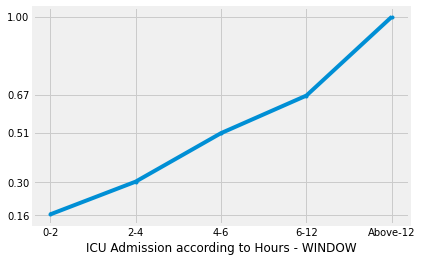

In [13]:
aux = abs(df.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum() - 5)
aux = aux.value_counts().reset_index()
aux.sort_values(by="index", inplace=True)
aux.reset_index(drop=True, inplace=True)

total_icu_patients = aux.ICU[0:5].sum()
y = aux.ICU[0:5].cumsum() / total_icu_patients
plt.plot(y, marker=".")

plt.xlabel("ICU Admission according to Hours - WINDOW")
plt.yticks(round(y, 2))
plt.xticks([0, 1, 2, 3, 4], ["0-2", "2-4", "4-6", "6-12", "Above-12"])
plt.show()


In [16]:
# What is the number of patients admitted to the intensive care unit during which hours?

class PatientICU_Relationship:

    def __init__(self):
        self.patient_zero_two_hours = []
        self.patient_two_four_hours = []
        self.patient_four_six_hours = []
        self.patient_six_twelve_hours = []
        self.patient_above_12 = []
        self.healthy_patient = []
        self.back_to_normal_stage = []
        self.new_data = []


    def patient_number(self, icu_personal):
        
        for i in range(len(icu_personal.PATIENT_VISIT_IDENTIFIER)):

            if icu_personal.ICU[i][0] == 1:
                self.patient_zero_two_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][1] == 0 or icu_personal.ICU[i][2] == 0 or icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])

            elif icu_personal.ICU[i][1] == 1:
                self.patient_two_four_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][2] == 0 or icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][2] == 1:
                self.patient_four_six_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][3] == 1:
                self.patient_six_twelve_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][4] == 1:
                self.patient_above_12.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])

            elif icu_personal.ICU[i][4] == 0:
                self.healthy_patient.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
        
        print("Number of patients admitted to ICU between 0 - 2 hours : {}".format(len(self.patient_zero_two_hours)))
        print("Number of patients admitted to ICU between 2 - 4 hours: {}".format(len(self.patient_two_four_hours)))
        print("Number of patients admitted to ICU between 4 and 6 hours: {}".format(len(self.patient_four_six_hours)))
        print("Number of patients admitted to ICU between 6 and 12 hours: {}".format(len(self.patient_six_twelve_hours)))
        print("Number of patients admitted to ICU above 12 hours: {}".format(len(self.patient_above_12)))
        print("Number of patients who unexperienced ICU: {}".format(len(self.healthy_patient)))
        print("Number of patients who back to the normal stage: {}".format(len(self.back_to_normal_stage)))
    
        self.new_data = [len(self.patient_zero_two_hours),
                         len(self.patient_two_four_hours),
                         len(self.patient_four_six_hours),
                         len(self.patient_six_twelve_hours),
                         len(self.patient_above_12),
                         len(self.healthy_patient)]
        
        
        return self.new_data, self.patient_zero_two_hours, self.patient_two_four_hours, self.patient_four_six_hours, self.patient_six_twelve_hours, self.patient_above_12, self.healthy_patient

    
total_number = PatientICU_Relationship()
new_data = total_number.patient_number(icu_personal)

Number of patients admitted to ICU between 0 - 2 hours : 32
Number of patients admitted to ICU between 2 - 4 hours: 27
Number of patients admitted to ICU between 4 and 6 hours: 40
Number of patients admitted to ICU between 6 and 12 hours: 31
Number of patients admitted to ICU above 12 hours: 65
Number of patients who unexperienced ICU: 190
Number of patients who back to the normal stage: 0


In [17]:
#Define function to compilate the ICU admission data
def ICU_admission(data):
    admission_data = data.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).max()[['PATIENT_VISIT_IDENTIFIER', 'ICU']]

    admission_time_data = data.groupby(by=['PATIENT_VISIT_IDENTIFIER', 'ICU'],
                                       as_index=False).first()[['PATIENT_VISIT_IDENTIFIER', 'ICU', 'WINDOW']]

    
    admission_data = admission_data.join(
        other=admission_time_data[admission_time_data['ICU'] == 1].set_index('PATIENT_VISIT_IDENTIFIER'),
        on='PATIENT_VISIT_IDENTIFIER',
        how='left',
        rsuffix='_R')

    # Label ICU
    ncount = len(admission_data)
    
    ### HISTOGRAM ACCORDING TO ICU
    ax = sns.countplot(admission_data['ICU'], palette='GnBu')
    sns.set(font_scale = 1)
    ax.set_xlabel("ICU")
    ax.set_ylabel("NUMBER OF PATIENT")
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    
    for p in ax.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')  # set the alignment of the text
    
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    
    plt.tight_layout()
    plt.title('Histogram of ICU Class', fontsize=14)
    plt.show()
    
    ### HISTOGRAM ACCORDING TO WINDOW
    ax2 = sns.countplot(admission_data['WINDOW'], palette='GnBu', order=["0-2","2-4","4-6","6-12","ABOVE_12"])
    sns.set(font_scale=1)
    ax2.set_xlabel("WINDOW INTERVALS")
    ax2.set_ylabel("NUMBER OF PATIENT ADMITTED TO THE ICU")
    fig = plt.gcf()
    fig.set_size_inches(10, 6)

    for p in ax2.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax2.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                    ha='center', va='bottom')  # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

    plt.tight_layout()
    plt.title('WINDOW x ICU Histogram', fontsize=14)
    plt.show()
    
    # count class
    class_1 = len(admission_data[admission_data['ICU'] == 1])
    class_0 = len(admission_data[admission_data['ICU'] == 0])
    print(len(admission_data['PATIENT_VISIT_IDENTIFIER']))
    
    # show
    print('\n')
    print('Number of patients who unexperienced ICU: {}'.format(class_0))
    print('Number of patients who experienced ICU: {}'.format(class_1))

    return admission_data.drop(columns='ICU_R')


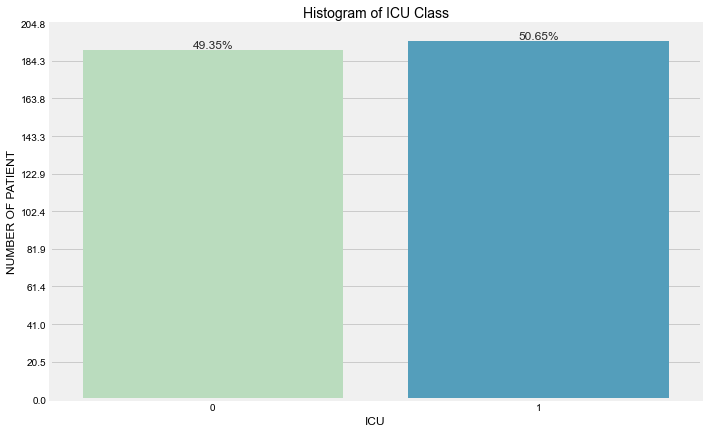

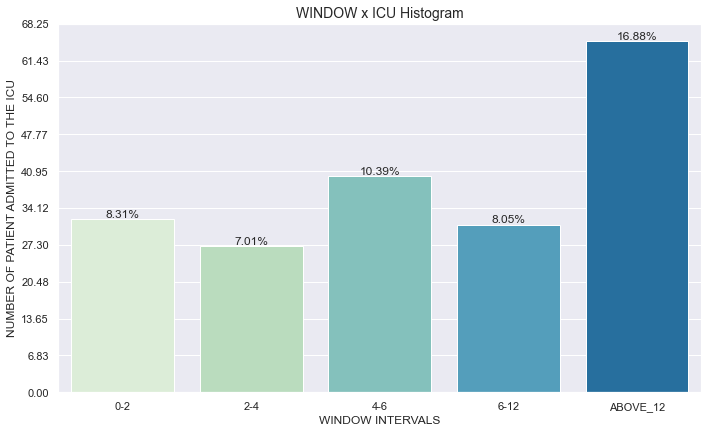

385


Number of patients who unexperienced ICU: 190
Number of patients who experienced ICU: 195


,PATIENT_VISIT_IDENTIFIER,ICU,WINDOW
0,0,1,ABOVE_12
1,1,1,0-2
2,2,1,ABOVE_12
3,3,0,NaN
4,4,0,NaN
...,...,...,...
380,380,1,ABOVE_12
381,381,0,NaN
382,382,1,ABOVE_12
383,383,0,NaN


In [18]:
#Get admission compiled data
admission_data = ICU_admission(df)
admission_data

<AxesSubplot:>

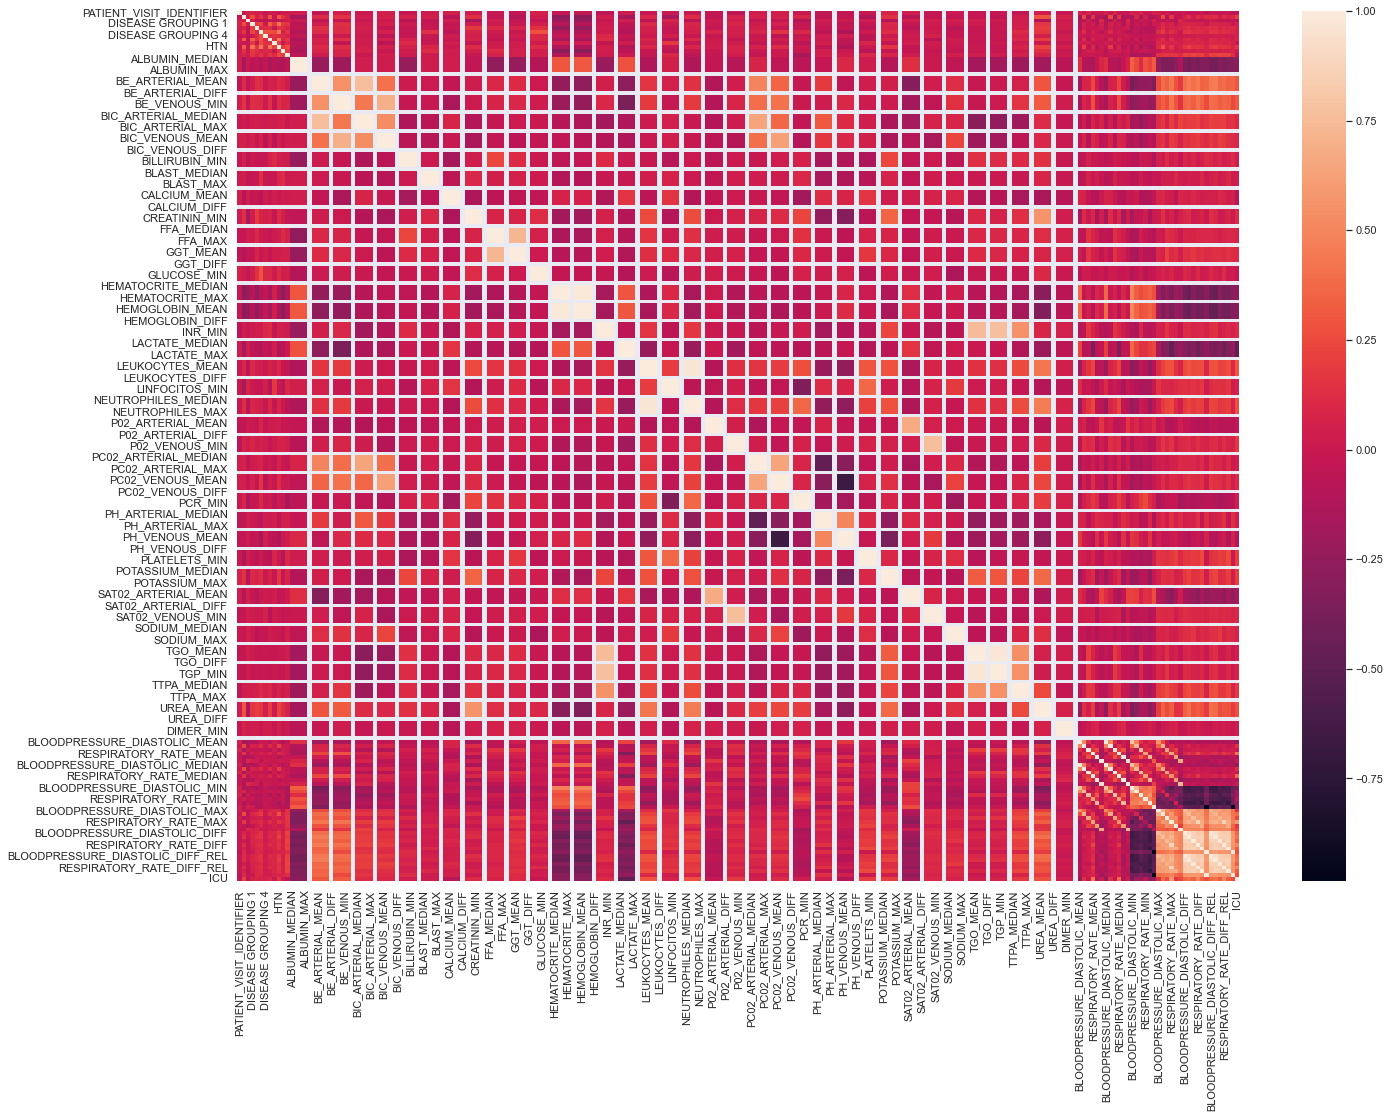

In [19]:
#Compute Pearson correlation
df_corr = df.corr()

sns.set(rc={"figure.figsize": (20, 16)})
sns.heatmap(df_corr)


In [20]:
# Show correlation values in stacked format
def rank_correlation_score (data):
    
    # Stacked correlation map into 3-columns format
    stacked_corr = data.corr().stack().reset_index().rename(
        columns = {"level_0":"Feature_1",
                   "level_1":"Feature_2",
                   0: "Pearson_Correlation"})
    
    # Remove redudant relationships
    stacked_corr = stacked_corr.query('Feature_1 != Feature_2')
    chained_feature_names = ['-'.join(np.sort(x)) for x in stacked_corr[['Feature_1', 'Feature_2']].values]
    stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names
    stacked_corr = stacked_corr.drop_duplicates(subset = 'Duplicate_Key').drop(columns = 'Duplicate_Key')

    #Remove correlations to the target
    stacked_corr = stacked_corr[stacked_corr['Feature_1'] != 'ICU']
    stacked_corr = stacked_corr[stacked_corr['Feature_2'] != 'ICU']
    
    # Order absolute correlation strenght
    stacked_corr['Pearson_Correlation'] = abs(stacked_corr['Pearson_Correlation'])
    return stacked_corr.sort_values(by='Pearson_Correlation', ascending=False)


stacked_df_corr = rank_correlation_score(df)
stacked_df_corr

,Feature_1,Feature_2,Pearson_Correlation
27161,TGP_MEDIAN,TGP_MEAN,1.000000
23282,POTASSIUM_MEDIAN,POTASSIUM_MIN,1.000000
7955,CALCIUM_MEAN,CALCIUM_MIN,1.000000
7956,CALCIUM_MEAN,CALCIUM_MAX,1.000000
13195,INR_MEDIAN,INR_MAX,1.000000
...,...,...,...
400,GENDER,ALBUMIN_MIN,0.000063
399,GENDER,ALBUMIN_MEAN,0.000063
398,GENDER,ALBUMIN_MEDIAN,0.000063
401,GENDER,ALBUMIN_MAX,0.000063


In [21]:
stacked_df_corr[stacked_df_corr['Pearson_Correlation'] > 0.99]


,Feature_1,Feature_2,Pearson_Correlation
27161,TGP_MEDIAN,TGP_MEAN,1.000000
23282,POTASSIUM_MEDIAN,POTASSIUM_MIN,1.000000
7955,CALCIUM_MEAN,CALCIUM_MIN,1.000000
7956,CALCIUM_MEAN,CALCIUM_MAX,1.000000
13195,INR_MEDIAN,INR_MAX,1.000000
...,...,...,...
35896,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL,0.999831
35120,BLOODPRESSURE_SISTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF_REL,0.991276
30658,HEART_RATE_MEAN,HEART_RATE_MEDIAN,0.991238
35508,RESPIRATORY_RATE_DIFF,RESPIRATORY_RATE_DIFF_REL,0.991107


In [22]:
#Investigate MEAN/MEDIAN correlations
stacked_df_corr['MEASURE_FEATURE_1'] = [x.split('_')[0] for x in stacked_df_corr['Feature_1']]
stacked_df_corr['MEASURE_FEATURE_2'] = [x.split('_')[0] for x in stacked_df_corr['Feature_2']]
stacked_df_corr['TYPE_FEATURE_1'] = [x.split('_')[-1] for x in stacked_df_corr['Feature_1']]
stacked_df_corr['TYPE_FEATURE_2'] = [x.split('_')[-1] for x in stacked_df_corr['Feature_2']]

mean_median_corr = stacked_df_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
mean_median_corr = mean_median_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_1'].isin(['MEDIAN', 'MEAN'])]
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_2'].isin(['MEDIAN', 'MEAN'])]

relevant_cols = ['Feature_1', 'Feature_2', 'Pearson_Correlation']
mean_median_corr[relevant_cols]

,Feature_1,Feature_2,Pearson_Correlation
27161,TGP_MEDIAN,TGP_MEAN,1.000000
13193,INR_MEDIAN,INR_MEAN,1.000000
23281,POTASSIUM_MEDIAN,POTASSIUM_MEAN,1.000000
4657,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,1.000000
8537,CREATININ_MEDIAN,CREATININ_MEAN,1.000000
27937,TTPA_MEDIAN,TTPA_MEAN,1.000000
7761,CALCIUM_MEDIAN,CALCIUM_MEAN,1.000000
20177,PCR_MEDIAN,PCR_MEAN,1.000000
26385,TGO_MEDIAN,TGO_MEAN,1.000000
3105,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,1.000000


In [23]:
#Investigate DIFF/DIFF_REL correlations
diff_corr = stacked_df_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
diff_corr = diff_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_1'].isin(['DIFF', 'REL'])]
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_2'].isin(['DIFF', 'REL'])]

diff_corr[relevant_cols]

,Feature_1,Feature_2,Pearson_Correlation
35702,TEMPERATURE_DIFF,TEMPERATURE_DIFF_REL,0.999898
35896,OXYGEN_SATURATION_DIFF,OXYGEN_SATURATION_DIFF_REL,0.999831
35120,BLOODPRESSURE_SISTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF_REL,0.991276
35508,RESPIRATORY_RATE_DIFF,RESPIRATORY_RATE_DIFF_REL,0.991107
34926,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,0.988137
35314,HEART_RATE_DIFF,HEART_RATE_DIFF_REL,0.983785
35119,BLOODPRESSURE_SISTOLIC_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,0.923985
34927,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF_REL,0.923707


In [24]:
def check_one_to_one(df, columns):

    # Check for one column
    if len(columns) == 1:
        return True

    # Check for 2 or more columns
    result = df.groupby(columns).count()
    uniqueness = [result.index.get_level_values(
        i).is_unique for i in range(result.index.nlevels)]

    return all(uniqueness)


# Getting combinations of all the columns
combinations = list(combinations(df.columns, 2))

# Running to see if any of them are identical
identical_columns = []

for column in np.arange(0, len(combinations), 1):
    x = [combinations[column][0], combinations[column][1]]
    if check_one_to_one(df, x) == True:
        identical_columns.append(combinations[column][0])

In [39]:
df_new = df.copy()  # Copy the dataset
all_columns = [x for x in df_new.columns if x not in identical_columns]
df_new = df_new.loc[:, all_columns]

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1   AGE_ABOVE65                       1925 non-null   int64  
 2   AGE_PERCENTIL                     1925 non-null   object 
 3   GENDER                            1925 non-null   int64  
 4   DISEASE GROUPING 1                1920 non-null   float64
 5   DISEASE GROUPING 2                1920 non-null   float64
 6   DISEASE GROUPING 3                1920 non-null   float64
 7   DISEASE GROUPING 4                1920 non-null   float64
 8   DISEASE GROUPING 5                1920 non-null   float64
 9   DISEASE GROUPING 6                1920 non-null   float64
 10  HTN                               1920 non-null   float64
 11  IMMUNOCOMPROMISED                 1920 non-null   float64
 12  OTHER 

In [42]:
#Define function to rearrange the data
admission_window_order = {
    '0-2': 1,
    '2-4': 2, 
    '4-6': 3,
    '6-12': 4,
    'ABOVE_12': 5}


def to_timeseries_format(data, position_dict):

    #Order dictionary
    position_dict = sorted(position_dict.items())

    #Split data
    df_list = []
    for position in position_dict:
        value, pos = position
        suffix = '_' + str(pos)
        df_list.append(data[data['WINDOW'] == value].add_suffix(
            suffix).reset_index(drop=True))

    #Reassemble data
    output_data = pd.concat(df_list, axis=1)
    return output_data


In [43]:
admission_window_order

{'0-2': 1, '2-4': 2, '4-6': 3, '6-12': 4, 'ABOVE_12': 5}

In [40]:
#Rearrange data into time series format
df_new = to_timeseries_format(df_new, admission_window_order)

# Drop PATIENT_VISIT_IDENTIFIER column
df_new = df_new.drop(columns=['PATIENT_VISIT_IDENTIFIER_2', 'PATIENT_VISIT_IDENTIFIER_3','PATIENT_VISIT_IDENTIFIER_4', 'PATIENT_VISIT_IDENTIFIER_5'])

df_new

,PATIENT_VISIT_IDENTIFIER_1,AGE_ABOVE65_1,AGE_PERCENTIL_1,GENDER_1,DISEASE GROUPING 1_1,DISEASE GROUPING 2_1,DISEASE GROUPING 3_1,DISEASE GROUPING 4_1,DISEASE GROUPING 5_1,DISEASE GROUPING 6_1,HTN_1,IMMUNOCOMPROMISED_1,OTHER_1,ALBUMIN_MAX_1,BE_ARTERIAL_MAX_1,BE_VENOUS_MAX_1,BIC_ARTERIAL_MAX_1,BIC_VENOUS_MAX_1,BILLIRUBIN_MAX_1,BLAST_MAX_1,CALCIUM_MAX_1,CREATININ_MAX_1,FFA_MAX_1,GGT_MAX_1,GLUCOSE_MAX_1,HEMATOCRITE_MAX_1,HEMOGLOBIN_MAX_1,INR_MAX_1,LACTATE_MAX_1,LEUKOCYTES_MAX_1,LINFOCITOS_MAX_1,NEUTROPHILES_MAX_1,P02_ARTERIAL_MAX_1,P02_VENOUS_MAX_1,PC02_ARTERIAL_MAX_1,PC02_VENOUS_MAX_1,PCR_MAX_1,PH_ARTERIAL_MAX_1,PH_VENOUS_MAX_1,PLATELETS_MAX_1,POTASSIUM_MAX_1,SAT02_ARTERIAL_MAX_1,SAT02_VENOUS_MAX_1,SODIUM_MAX_1,TGO_MAX_1,TGP_MAX_1,TTPA_MAX_1,UREA_MAX_1,DIMER_MAX_1,DIMER_DIFF_1,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEAN_1,HEART_RATE_MEAN_1,RESPIRATORY_RATE_MEAN_1,TEMPERATURE_MEAN_1,OXYGEN_SATURATION_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,HEART_RATE_MEDIAN_1,RESPIRATORY_RATE_MEDIAN_1,TEMPERATURE_MEDIAN_1,OXYGEN_SATURATION_MEDIAN_1,BLOODPRESSURE_DIASTOLIC_MIN_1,BLOODPRESSURE_SISTOLIC_MIN_1,HEART_RATE_MIN_1,RESPIRATORY_RATE_MIN_1,TEMPERATURE_MIN_1,OXYGEN_SATURATION_MIN_1,BLOODPRESSURE_DIASTOLIC_MAX_1,BLOODPRESSURE_SISTOLIC_MAX_1,HEART_RATE_MAX_1,RESPIRATORY_RATE_MAX_1,TEMPERATURE_MAX_1,OXYGEN_SATURATION_MAX_1,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_1,HEART_RATE_DIFF_1,RESPIRATORY_RATE_DIFF_1,TEMPERATURE_DIFF_1,OXYGEN_SATURATION_DIFF_1,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,HEART_RATE_DIFF_REL_1,RESPIRATORY_RATE_DIFF_REL_1,TEMPERATURE_DIFF_REL_1,OXYGEN_SATURATION_DIFF_REL_1,WINDOW_1,ICU_1,AGE_ABOVE65_2,AGE_PERCENTIL_2,GENDER_2,DISEASE GROUPING 1_2,DISEASE GROUPING 2_2,DISEASE GROUPING 3_2,DISEASE GROUPING 4_2,DISEASE GROUPING 5_2,DISEASE GROUPING 6_2,HTN_2,IMMUNOCOMPROMISED_2,OTHER_2,ALBUMIN_MAX_2,BE_ARTERIAL_MAX_2,BE_VENOUS_MAX_2,BIC_ARTERIAL_MAX_2,BIC_VENOUS_MAX_2,BILLIRUBIN_MAX_2,BLAST_MAX_2,CALCIUM_MAX_2,CREATININ_MAX_2,FFA_MAX_2,GGT_MAX_2,GLUCOSE_MAX_2,HEMATOCRITE_MAX_2,HEMOGLOBIN_MAX_2,INR_MAX_2,LACTATE_MAX_2,LEUKOCYTES_MAX_2,LINFOCITOS_MAX_2,NEUTROPHILES_MAX_2,P02_ARTERIAL_MAX_2,P02_VENOUS_MAX_2,PC02_ARTERIAL_MAX_2,PC02_VENOUS_MAX_2,PCR_MAX_2,PH_ARTERIAL_MAX_2,PH_VENOUS_MAX_2,PLATELETS_MAX_2,POTASSIUM_MAX_2,SAT02_ARTERIAL_MAX_2,SAT02_VENOUS_MAX_2,SODIUM_MAX_2,TGO_MAX_2,TGP_MAX_2,TTPA_MAX_2,UREA_MAX_2,DIMER_MAX_2,DIMER_DIFF_2,BLOODPRESSURE_DIASTOLIC_MEAN_2,BLOODPRESSURE_SISTOLIC_MEAN_2,HEART_RATE_MEAN_2,RESPIRATORY_RATE_MEAN_2,TEMPERATURE_MEAN_2,OXYGEN_SATURATION_MEAN_2,BLOODPRESSURE_DIASTOLIC_MEDIAN_2,BLOODPRESSURE_SISTOLIC_MEDIAN_2,HEART_RATE_MEDIAN_2,RESPIRATORY_RATE_MEDIAN_2,TEMPERATURE_MEDIAN_2,OXYGEN_SATURATION_MEDIAN_2,BLOODPRESSURE_DIASTOLIC_MIN_2,BLOODPRESSURE_SISTOLIC_MIN_2,HEART_RATE_MIN_2,RESPIRATORY_RATE_MIN_2,TEMPERATURE_MIN_2,OXYGEN_SATURATION_MIN_2,BLOODPRESSURE_DIASTOLIC_MAX_2,BLOODPRESSURE_SISTOLIC_MAX_2,HEART_RATE_MAX_2,RESPIRATORY_RATE_MAX_2,TEMPERATURE_MAX_2,OXYGEN_SATURATION_MAX_2,BLOODPRESSURE_DIASTOLIC_DIFF_2,BLOODPRESSURE_SISTOLIC_DIFF_2,HEART_RATE_DIFF_2,RESPIRATORY_RATE_DIFF_2,TEMPERATURE_DIFF_2,OXYGEN_SATURATION_DIFF_2,BLOODPRESSURE_DIASTOLIC_DIFF_REL_2,BLOODPRESSURE_SISTOLIC_DIFF_REL_2,HEART_RATE_DIFF_REL_2,RESPIRATORY_RATE_DIFF_REL_2,TEMPERATURE_DIFF_REL_2,OXYGEN_SATURATION_DIFF_REL_2,WINDOW_2,ICU_2,AGE_ABOVE65_3,AGE_PERCENTIL_3,GENDER_3,DISEASE GROUPING 1_3,DISEASE GROUPING 2_3,DISEASE GROUPING 3_3,DISEASE GROUPING 4_3,DISEASE GROUPING 5_3,DISEASE GROUPING 6_3,HTN_3,IMMUNOCOMPROMISED_3,OTHER_3,ALBUMIN_MAX_3,BE_ARTERIAL_MAX_3,BE_VENOUS_MAX_3,BIC_ARTERIAL_MAX_3,BIC_VENOUS_MAX_3,BILLIRUBIN_MAX_3,BLAST_MAX_3,CALCIUM_MAX_3,CREATININ_MAX_3,FFA_MAX_3,GGT_MAX_3,GLUCOSE_MAX_3,HEMATOCRITE_MAX_3,HEMOGLOBIN_MAX_3,INR_MAX_3,LACTATE_MAX_3,LEUKOCYTES_MAX_3,LINFOCITOS_MAX_3,NEUTROPHILES_MAX_3,P02_ARTERIAL_MAX_3,P02_VENOUS_MAX_3,PC02_ARTERIAL_MAX_3,PC02_VENOUS_MAX_3,PCR_MAX_3,PH_ARTERIAL_MAX_3,PH_VENOUS_MAX_3,PLATELET

In [45]:
#Define function to remove redudant columns
def remove_redudant_cols(data, cols, range_begin, range_end):
    for n in range(range_begin, range_end+1):
        rm_cols = [x + '_'  + str(n) for x in cols]
        data = data.drop(columns = rm_cols)
        
    return data

In [46]:
#Remove redudant columns
redudant_cols = ['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'HTN', 'WINDOW']
df_new = remove_redudant_cols(df_new, redudant_cols, 2, 5).drop(columns = 'WINDOW_1')

df_new


,PATIENT_VISIT_IDENTIFIER_1,AGE_ABOVE65_1,AGE_PERCENTIL_1,GENDER_1,DISEASE GROUPING 1_1,DISEASE GROUPING 2_1,DISEASE GROUPING 3_1,DISEASE GROUPING 4_1,DISEASE GROUPING 5_1,DISEASE GROUPING 6_1,HTN_1,IMMUNOCOMPROMISED_1,OTHER_1,ALBUMIN_MAX_1,BE_ARTERIAL_MAX_1,BE_VENOUS_MAX_1,BIC_ARTERIAL_MAX_1,BIC_VENOUS_MAX_1,BILLIRUBIN_MAX_1,BLAST_MAX_1,CALCIUM_MAX_1,CREATININ_MAX_1,FFA_MAX_1,GGT_MAX_1,GLUCOSE_MAX_1,HEMATOCRITE_MAX_1,HEMOGLOBIN_MAX_1,INR_MAX_1,LACTATE_MAX_1,LEUKOCYTES_MAX_1,LINFOCITOS_MAX_1,NEUTROPHILES_MAX_1,P02_ARTERIAL_MAX_1,P02_VENOUS_MAX_1,PC02_ARTERIAL_MAX_1,PC02_VENOUS_MAX_1,PCR_MAX_1,PH_ARTERIAL_MAX_1,PH_VENOUS_MAX_1,PLATELETS_MAX_1,POTASSIUM_MAX_1,SAT02_ARTERIAL_MAX_1,SAT02_VENOUS_MAX_1,SODIUM_MAX_1,TGO_MAX_1,TGP_MAX_1,TTPA_MAX_1,UREA_MAX_1,DIMER_MAX_1,DIMER_DIFF_1,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEAN_1,HEART_RATE_MEAN_1,RESPIRATORY_RATE_MEAN_1,TEMPERATURE_MEAN_1,OXYGEN_SATURATION_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,HEART_RATE_MEDIAN_1,RESPIRATORY_RATE_MEDIAN_1,TEMPERATURE_MEDIAN_1,OXYGEN_SATURATION_MEDIAN_1,BLOODPRESSURE_DIASTOLIC_MIN_1,BLOODPRESSURE_SISTOLIC_MIN_1,HEART_RATE_MIN_1,RESPIRATORY_RATE_MIN_1,TEMPERATURE_MIN_1,OXYGEN_SATURATION_MIN_1,BLOODPRESSURE_DIASTOLIC_MAX_1,BLOODPRESSURE_SISTOLIC_MAX_1,HEART_RATE_MAX_1,RESPIRATORY_RATE_MAX_1,TEMPERATURE_MAX_1,OXYGEN_SATURATION_MAX_1,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_1,HEART_RATE_DIFF_1,RESPIRATORY_RATE_DIFF_1,TEMPERATURE_DIFF_1,OXYGEN_SATURATION_DIFF_1,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,HEART_RATE_DIFF_REL_1,RESPIRATORY_RATE_DIFF_REL_1,TEMPERATURE_DIFF_REL_1,OXYGEN_SATURATION_DIFF_REL_1,ICU_1,DISEASE GROUPING 1_2,DISEASE GROUPING 2_2,DISEASE GROUPING 3_2,DISEASE GROUPING 4_2,DISEASE GROUPING 5_2,DISEASE GROUPING 6_2,IMMUNOCOMPROMISED_2,OTHER_2,ALBUMIN_MAX_2,BE_ARTERIAL_MAX_2,BE_VENOUS_MAX_2,BIC_ARTERIAL_MAX_2,BIC_VENOUS_MAX_2,BILLIRUBIN_MAX_2,BLAST_MAX_2,CALCIUM_MAX_2,CREATININ_MAX_2,FFA_MAX_2,GGT_MAX_2,GLUCOSE_MAX_2,HEMATOCRITE_MAX_2,HEMOGLOBIN_MAX_2,INR_MAX_2,LACTATE_MAX_2,LEUKOCYTES_MAX_2,LINFOCITOS_MAX_2,NEUTROPHILES_MAX_2,P02_ARTERIAL_MAX_2,P02_VENOUS_MAX_2,PC02_ARTERIAL_MAX_2,PC02_VENOUS_MAX_2,PCR_MAX_2,PH_ARTERIAL_MAX_2,PH_VENOUS_MAX_2,PLATELETS_MAX_2,POTASSIUM_MAX_2,SAT02_ARTERIAL_MAX_2,SAT02_VENOUS_MAX_2,SODIUM_MAX_2,TGO_MAX_2,TGP_MAX_2,TTPA_MAX_2,UREA_MAX_2,DIMER_MAX_2,DIMER_DIFF_2,BLOODPRESSURE_DIASTOLIC_MEAN_2,BLOODPRESSURE_SISTOLIC_MEAN_2,HEART_RATE_MEAN_2,RESPIRATORY_RATE_MEAN_2,TEMPERATURE_MEAN_2,OXYGEN_SATURATION_MEAN_2,BLOODPRESSURE_DIASTOLIC_MEDIAN_2,BLOODPRESSURE_SISTOLIC_MEDIAN_2,HEART_RATE_MEDIAN_2,RESPIRATORY_RATE_MEDIAN_2,TEMPERATURE_MEDIAN_2,OXYGEN_SATURATION_MEDIAN_2,BLOODPRESSURE_DIASTOLIC_MIN_2,BLOODPRESSURE_SISTOLIC_MIN_2,HEART_RATE_MIN_2,RESPIRATORY_RATE_MIN_2,TEMPERATURE_MIN_2,OXYGEN_SATURATION_MIN_2,BLOODPRESSURE_DIASTOLIC_MAX_2,BLOODPRESSURE_SISTOLIC_MAX_2,HEART_RATE_MAX_2,RESPIRATORY_RATE_MAX_2,TEMPERATURE_MAX_2,OXYGEN_SATURATION_MAX_2,BLOODPRESSURE_DIASTOLIC_DIFF_2,BLOODPRESSURE_SISTOLIC_DIFF_2,HEART_RATE_DIFF_2,RESPIRATORY_RATE_DIFF_2,TEMPERATURE_DIFF_2,OXYGEN_SATURATION_DIFF_2,BLOODPRESSURE_DIASTOLIC_DIFF_REL_2,BLOODPRESSURE_SISTOLIC_DIFF_REL_2,HEART_RATE_DIFF_REL_2,RESPIRATORY_RATE_DIFF_REL_2,TEMPERATURE_DIFF_REL_2,OXYGEN_SATURATION_DIFF_REL_2,ICU_2,DISEASE GROUPING 1_3,DISEASE GROUPING 2_3,DISEASE GROUPING 3_3,DISEASE GROUPING 4_3,DISEASE GROUPING 5_3,DISEASE GROUPING 6_3,IMMUNOCOMPROMISED_3,OTHER_3,ALBUMIN_MAX_3,BE_ARTERIAL_MAX_3,BE_VENOUS_MAX_3,BIC_ARTERIAL_MAX_3,BIC_VENOUS_MAX_3,BILLIRUBIN_MAX_3,BLAST_MAX_3,CALCIUM_MAX_3,CREATININ_MAX_3,FFA_MAX_3,GGT_MAX_3,GLUCOSE_MAX_3,HEMATOCRITE_MAX_3,HEMOGLOBIN_MAX_3,INR_MAX_3,LACTATE_MAX_3,LEUKOCYTES_MAX_3,LINFOCITOS_MAX_3,NEUTROPHILES_MAX_3,P02_ARTERIAL_MAX_3,P02_VENOUS_MAX_3,PC02_ARTERIAL_MAX_3,PC02_VENOUS_MAX_3,PCR_MAX_3,PH_ARTERIAL_MAX_3,PH_VENOUS_MAX_3,PLATELETS_MAX_3,POTASSIUM_MAX_3,SAT02_ARTERIAL_MAX_3,SAT02_VENOUS_MAX_3,SODIUM_MAX_3,TGO_MAX_3,TGP_MAX_3,TTPA_MAX_3,

In [50]:
# Identify features with missing values as a percentage of the total number of records
null_values = df_new.isnull().sum()
null_values = 100 * null_values[null_values > 0] / len(df_new)

null_values.sort_values(ascending = False)

TGP_MAX_3                       89.090909
ALBUMIN_MAX_3                   89.090909
LINFOCITOS_MAX_3                89.090909
LEUKOCYTES_MAX_3                89.090909
LACTATE_MAX_3                   89.090909
                                  ...    
DISEASE GROUPING 1_4             0.259740
DISEASE GROUPING 2_1             0.259740
OTHER_3                          0.259740
IMMUNOCOMPROMISED_3              0.259740
OXYGEN_SATURATION_DIFF_REL_5     0.259740
Length: 406, dtype: float64

In [51]:
over_50pct_nulls = null_values[null_values > 50]
print(over_50pct_nulls.sort_index())

ALBUMIN_MAX_1        55.324675
ALBUMIN_MAX_2        54.025974
ALBUMIN_MAX_3        89.090909
ALBUMIN_MAX_4        85.454545
BE_ARTERIAL_MAX_1    55.324675
                       ...    
TTPA_MAX_4           85.454545
UREA_MAX_1           55.324675
UREA_MAX_2           54.025974
UREA_MAX_3           89.090909
UREA_MAX_4           85.454545
Length: 220, dtype: float64


In [52]:
#Identifying which feature groups are mostly composed of missing values
over_50pct_nulls = over_50pct_nulls.reset_index(level = 0).rename(columns = {'index': 'Feature', 0: 'Null_Pct'})
over_50pct_nulls['Feature_Group'] = [x[:-2] for x in over_50pct_nulls['Feature']]

null_aggregate = over_50pct_nulls.groupby(by = 'Feature_Group').agg({'Null_Pct': ['count', 'min', 'max']})
print(null_aggregate)

                 Null_Pct                      
                    count        min        max
Feature_Group                                  
ALBUMIN_MAX             4  54.025974  89.090909
BE_ARTERIAL_MAX         4  54.025974  89.090909
BE_VENOUS_MAX           4  54.025974  89.090909
BIC_ARTERIAL_MAX        4  54.025974  89.090909
BIC_VENOUS_MAX          4  54.025974  89.090909
...                   ...        ...        ...
TEMPERATURE_MIN         2  55.844156  68.311688
TGO_MAX                 4  54.025974  89.090909
TGP_MAX                 4  54.025974  89.090909
TTPA_MAX                4  54.025974  89.090909
UREA_MAX                4  54.025974  89.090909

[73 rows x 3 columns]


In [53]:
null_aggregate.columns = ['_'.join(col).strip() for col in null_aggregate.columns.values]
null_aggregate.query('Null_Pct_count == 4 & Null_Pct_min > 50')

,Null_Pct_count,Null_Pct_min,Null_Pct_max
Feature_Group,,,
ALBUMIN_MAX,4,54.025974,89.090909
BE_ARTERIAL_MAX,4,54.025974,89.090909
BE_VENOUS_MAX,4,54.025974,89.090909
BIC_ARTERIAL_MAX,4,54.025974,89.090909
BIC_VENOUS_MAX,4,54.025974,89.090909
BILLIRUBIN_MAX,4,54.025974,89.090909
BLAST_MAX,4,54.025974,89.090909
CALCIUM_MAX,4,54.025974,89.090909
CREATININ_MAX,4,54.025974,89.090909


In [54]:
#Remove columns with overrepresentation of null values
over_50pct_nulls = null_aggregate.query('Null_Pct_count == 4 & Null_Pct_min > 50').index

for n in range(1, 6):
    remove_cols = [x + '_' + str(n) for x in over_50pct_nulls]
    df_new = df_new.drop(columns=remove_cols)

df_new.head()


,PATIENT_VISIT_IDENTIFIER_1,AGE_ABOVE65_1,AGE_PERCENTIL_1,GENDER_1,DISEASE GROUPING 1_1,DISEASE GROUPING 2_1,DISEASE GROUPING 3_1,DISEASE GROUPING 4_1,DISEASE GROUPING 5_1,DISEASE GROUPING 6_1,HTN_1,IMMUNOCOMPROMISED_1,OTHER_1,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEAN_1,HEART_RATE_MEAN_1,RESPIRATORY_RATE_MEAN_1,TEMPERATURE_MEAN_1,OXYGEN_SATURATION_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,HEART_RATE_MEDIAN_1,RESPIRATORY_RATE_MEDIAN_1,TEMPERATURE_MEDIAN_1,OXYGEN_SATURATION_MEDIAN_1,BLOODPRESSURE_DIASTOLIC_MIN_1,BLOODPRESSURE_SISTOLIC_MIN_1,HEART_RATE_MIN_1,RESPIRATORY_RATE_MIN_1,TEMPERATURE_MIN_1,OXYGEN_SATURATION_MIN_1,BLOODPRESSURE_DIASTOLIC_MAX_1,BLOODPRESSURE_SISTOLIC_MAX_1,HEART_RATE_MAX_1,RESPIRATORY_RATE_MAX_1,TEMPERATURE_MAX_1,OXYGEN_SATURATION_MAX_1,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_1,HEART_RATE_DIFF_1,RESPIRATORY_RATE_DIFF_1,TEMPERATURE_DIFF_1,OXYGEN_SATURATION_DIFF_1,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,HEART_RATE_DIFF_REL_1,RESPIRATORY_RATE_DIFF_REL_1,TEMPERATURE_DIFF_REL_1,OXYGEN_SATURATION_DIFF_REL_1,ICU_1,DISEASE GROUPING 1_2,DISEASE GROUPING 2_2,DISEASE GROUPING 3_2,DISEASE GROUPING 4_2,DISEASE GROUPING 5_2,DISEASE GROUPING 6_2,IMMUNOCOMPROMISED_2,OTHER_2,BLOODPRESSURE_DIASTOLIC_MEAN_2,BLOODPRESSURE_SISTOLIC_MEAN_2,HEART_RATE_MEAN_2,RESPIRATORY_RATE_MEAN_2,TEMPERATURE_MEAN_2,OXYGEN_SATURATION_MEAN_2,BLOODPRESSURE_DIASTOLIC_MEDIAN_2,BLOODPRESSURE_SISTOLIC_MEDIAN_2,HEART_RATE_MEDIAN_2,RESPIRATORY_RATE_MEDIAN_2,TEMPERATURE_MEDIAN_2,OXYGEN_SATURATION_MEDIAN_2,BLOODPRESSURE_DIASTOLIC_MIN_2,BLOODPRESSURE_SISTOLIC_MIN_2,HEART_RATE_MIN_2,RESPIRATORY_RATE_MIN_2,TEMPERATURE_MIN_2,OXYGEN_SATURATION_MIN_2,BLOODPRESSURE_DIASTOLIC_MAX_2,BLOODPRESSURE_SISTOLIC_MAX_2,HEART_RATE_MAX_2,RESPIRATORY_RATE_MAX_2,TEMPERATURE_MAX_2,OXYGEN_SATURATION_MAX_2,BLOODPRESSURE_DIASTOLIC_DIFF_2,BLOODPRESSURE_SISTOLIC_DIFF_2,HEART_RATE_DIFF_2,RESPIRATORY_RATE_DIFF_2,TEMPERATURE_DIFF_2,OXYGEN_SATURATION_DIFF_2,BLOODPRESSURE_DIASTOLIC_DIFF_REL_2,BLOODPRESSURE_SISTOLIC_DIFF_REL_2,HEART_RATE_DIFF_REL_2,RESPIRATORY_RATE_DIFF_REL_2,TEMPERATURE_DIFF_REL_2,OXYGEN_SATURATION_DIFF_REL_2,ICU_2,DISEASE GROUPING 1_3,DISEASE GROUPING 2_3,DISEASE GROUPING 3_3,DISEASE GROUPING 4_3,DISEASE GROUPING 5_3,DISEASE GROUPING 6_3,IMMUNOCOMPROMISED_3,OTHER_3,BLOODPRESSURE_DIASTOLIC_MEAN_3,BLOODPRESSURE_SISTOLIC_MEAN_3,HEART_RATE_MEAN_3,RESPIRATORY_RATE_MEAN_3,TEMPERATURE_MEAN_3,OXYGEN_SATURATION_MEAN_3,BLOODPRESSURE_DIASTOLIC_MEDIAN_3,BLOODPRESSURE_SISTOLIC_MEDIAN_3,HEART_RATE_MEDIAN_3,RESPIRATORY_RATE_MEDIAN_3,TEMPERATURE_MEDIAN_3,OXYGEN_SATURATION_MEDIAN_3,BLOODPRESSURE_DIASTOLIC_MIN_3,BLOODPRESSURE_SISTOLIC_MIN_3,HEART_RATE_MIN_3,RESPIRATORY_RATE_MIN_3,TEMPERATURE_MIN_3,OXYGEN_SATURATION_MIN_3,BLOODPRESSURE_DIASTOLIC_MAX_3,BLOODPRESSURE_SISTOLIC_MAX_3,HEART_RATE_MAX_3,RESPIRATORY_RATE_MAX_3,TEMPERATURE_MAX_3,OXYGEN_SATURATION_MAX_3,BLOODPRESSURE_DIASTOLIC_DIFF_3,BLOODPRESSURE_SISTOLIC_DIFF_3,HEART_RATE_DIFF_3,RESPIRATORY_RATE_DIFF_3,TEMPERATURE_DIFF_3,OXYGEN_SATURATION_DIFF_3,BLOODPRESSURE_DIASTOLIC_DIFF_REL_3,BLOODPRESSURE_SISTOLIC_DIFF_REL_3,HEART_RATE_DIFF_REL_3,RESPIRATORY_RATE_DIFF_REL_3,TEMPERATURE_DIFF_REL_3,OXYGEN_SATURATION_DIFF_REL_3,ICU_3,DISEASE GROUPING 1_4,DISEASE GROUPING 2_4,DISEASE GROUPING 3_4,DISEASE GROUPING 4_4,DISEASE GROUPING 5_4,DISEASE GROUPING 6_4,IMMUNOCOMPROMISED_4,OTHER_4,BLOODPRESSURE_DIASTOLIC_MEAN_4,BLOODPRESSURE_SISTOLIC_MEAN_4,HEART_RATE_MEAN_4,RESPIRATORY_RATE_MEAN_4,TEMPERATURE_MEAN_4,OXYGEN_SATURATION_MEAN_4,BLOODPRESSURE_DIASTOLIC_MEDIAN_4,BLOODPRESSURE_SISTOLIC_MEDIAN_4,HEART_RATE_MEDIAN_4,RESPIRATORY_RATE_MEDIAN_4,TEMPERATURE_MEDIAN_4,OXYGEN_SATURATION_MEDIAN_4,BLOODPRESSURE_DIASTOLIC_MIN_4,BLOODPRESSURE_SISTOLIC_MIN_4,HEART_RATE_MIN_4,RESPIRATORY_RATE_MIN_4,TEMPERATURE_MIN_4,OXYGEN_SATURATION_MIN_4,BLOODPRESSURE_DIASTOLIC_MAX_4,BLOODPRESSURE_SISTOLIC_MAX_4,HEART_RATE_MAX_4,RESPIRATORY_RATE_MAX_4,TEMPERATURE_MAX_4,OXYGEN_SATU

In [56]:
null_values = df_new.isnull().sum()
null_values = 100 * null_values[null_values > 0] / len(df_new)

null_values.sort_index()

BLOODPRESSURE_DIASTOLIC_DIFF_1    64.415584
BLOODPRESSURE_DIASTOLIC_DIFF_2    54.025974
BLOODPRESSURE_DIASTOLIC_DIFF_3    43.636364
BLOODPRESSURE_DIASTOLIC_DIFF_4    15.584416
BLOODPRESSURE_DIASTOLIC_DIFF_5     0.259740
                                    ...    
TEMPERATURE_MIN_1                 68.311688
TEMPERATURE_MIN_2                 55.844156
TEMPERATURE_MIN_3                 43.896104
TEMPERATURE_MIN_4                 11.948052
TEMPERATURE_MIN_5                  0.259740
Length: 221, dtype: float64

In [57]:
#Split columns into time variant or patient constant
col_groups = np.unique([x[:-2] for x in df_new.columns.values], return_counts = True)
time_cols = [col_groups[0][x] for x in range(len(col_groups[0])) if col_groups[1][x] > 1]
constant_cols = [x + '_1' for x in col_groups[0] if x not in time_cols]

In [58]:
#Define function to fill the missing values on the time variant features
def fill_missing_values(data, time_group, const_group):
    
    group_df = [data[const_group]]
    for group in time_group:
        col_names = [group + '_' + str(x) for x in range(1, 6)]
        group_df.append(data[col_names]\
                        .fillna(method = 'bfill', axis = 1).reset_index(drop = True)\
                        .fillna(method = "ffill", axis = 1).reset_index(drop = True))
    
    return pd.concat(group_df, axis = 1)

In [59]:
# Fill missing values
df_new = fill_missing_values(df_new,time_cols, constant_cols)

null_values = df_new.isnull().sum()
null_values[null_values > 0].sort_values(ascending = False)

HTN_1                         1
OXYGEN_SATURATION_MEDIAN_2    1
OXYGEN_SATURATION_MAX_1       1
OXYGEN_SATURATION_MAX_2       1
OXYGEN_SATURATION_MAX_3       1
                             ..
DISEASE GROUPING 4_2          1
DISEASE GROUPING 4_3          1
DISEASE GROUPING 4_4          1
DISEASE GROUPING 4_5          1
TEMPERATURE_MIN_5             1
Length: 221, dtype: int64

In [60]:
#Check which rows still have missing values
null_values = df_new.isnull().sum(axis=1)
null_rows = null_values[null_values > 0].index.values

print(null_rows)


[199]


In [61]:
# remove remaining missing values
df_new = df_new.drop(index = null_rows)

In [62]:
# How was the data filled?
columns = ["OXYGEN_SATURATION_MAX_1", "OXYGEN_SATURATION_MAX_2",
           "OXYGEN_SATURATION_MAX_3", "OXYGEN_SATURATION_MAX_4", "OXYGEN_SATURATION_MAX_5"]
df_new[columns]


,OXYGEN_SATURATION_MAX_1,OXYGEN_SATURATION_MAX_2,OXYGEN_SATURATION_MAX_3,OXYGEN_SATURATION_MAX_4,OXYGEN_SATURATION_MAX_5
0,0.736842,0.578947,0.736842,0.736842,0.947368
1,1.000000,0.894737,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,0.947368
3,0.684211,0.684211,0.684211,0.578947,1.000000
4,0.894737,0.894737,0.894737,0.947368,0.894737
...,...,...,...,...,...
380,0.736842,0.578947,0.578947,0.684211,0.894737
381,0.526316,0.526316,0.526316,0.526316,0.789474
382,0.894737,0.894737,0.578947,0.578947,0.842105
383,0.736842,0.736842,0.736842,0.684211,0.894737


In [64]:
# discard unreliable data
mask_unreliable = (df_new.ICU_1 == 1)
df_new = df_new.loc[~mask_unreliable]

In [65]:
ICU_col_values = df_new[["PATIENT_VISIT_IDENTIFIER_1","ICU_1", "ICU_2", "ICU_3", "ICU_4", "ICU_5"]]

In [68]:
ICU_col_values

,PATIENT_VISIT_IDENTIFIER_1,ICU_1,ICU_2,ICU_3,ICU_4,ICU_5
0,0,0,0,0,0,1
2,2,0,0,0,0,1
3,3,0,0,0,0,0
4,4,0,0,0,0,0
5,5,0,0,0,0,0
...,...,...,...,...,...,...
380,380,0,0,0,0,1
381,381,0,0,0,0,0
382,382,0,0,0,0,1
383,383,0,0,0,0,0


In [66]:
# Delete the ICU columns
ICU_col = ["ICU_1","ICU_2","ICU_3","ICU_4","ICU_5"]
df_new = df_new.drop(columns= ICU_col)

In [67]:
df_new

,AGE_ABOVE65_1,AGE_PERCENTIL_1,GENDER_1,HTN_1,PATIENT_VISIT_IDENTIFIER_1,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_DIASTOLIC_DIFF_2,BLOODPRESSURE_DIASTOLIC_DIFF_3,BLOODPRESSURE_DIASTOLIC_DIFF_4,BLOODPRESSURE_DIASTOLIC_DIFF_5,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,BLOODPRESSURE_DIASTOLIC_DIFF_REL_2,BLOODPRESSURE_DIASTOLIC_DIFF_REL_3,BLOODPRESSURE_DIASTOLIC_DIFF_REL_4,BLOODPRESSURE_DIASTOLIC_DIFF_REL_5,BLOODPRESSURE_DIASTOLIC_MAX_1,BLOODPRESSURE_DIASTOLIC_MAX_2,BLOODPRESSURE_DIASTOLIC_MAX_3,BLOODPRESSURE_DIASTOLIC_MAX_4,BLOODPRESSURE_DIASTOLIC_MAX_5,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEAN_2,BLOODPRESSURE_DIASTOLIC_MEAN_3,BLOODPRESSURE_DIASTOLIC_MEAN_4,BLOODPRESSURE_DIASTOLIC_MEAN_5,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_2,BLOODPRESSURE_DIASTOLIC_MEDIAN_3,BLOODPRESSURE_DIASTOLIC_MEDIAN_4,BLOODPRESSURE_DIASTOLIC_MEDIAN_5,BLOODPRESSURE_DIASTOLIC_MIN_1,BLOODPRESSURE_DIASTOLIC_MIN_2,BLOODPRESSURE_DIASTOLIC_MIN_3,BLOODPRESSURE_DIASTOLIC_MIN_4,BLOODPRESSURE_DIASTOLIC_MIN_5,BLOODPRESSURE_SISTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_2,BLOODPRESSURE_SISTOLIC_DIFF_3,BLOODPRESSURE_SISTOLIC_DIFF_4,BLOODPRESSURE_SISTOLIC_DIFF_5,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_2,BLOODPRESSURE_SISTOLIC_DIFF_REL_3,BLOODPRESSURE_SISTOLIC_DIFF_REL_4,BLOODPRESSURE_SISTOLIC_DIFF_REL_5,BLOODPRESSURE_SISTOLIC_MAX_1,BLOODPRESSURE_SISTOLIC_MAX_2,BLOODPRESSURE_SISTOLIC_MAX_3,BLOODPRESSURE_SISTOLIC_MAX_4,BLOODPRESSURE_SISTOLIC_MAX_5,BLOODPRESSURE_SISTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEAN_2,BLOODPRESSURE_SISTOLIC_MEAN_3,BLOODPRESSURE_SISTOLIC_MEAN_4,BLOODPRESSURE_SISTOLIC_MEAN_5,BLOODPRESSURE_SISTOLIC_MEDIAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_2,BLOODPRESSURE_SISTOLIC_MEDIAN_3,BLOODPRESSURE_SISTOLIC_MEDIAN_4,BLOODPRESSURE_SISTOLIC_MEDIAN_5,BLOODPRESSURE_SISTOLIC_MIN_1,BLOODPRESSURE_SISTOLIC_MIN_2,BLOODPRESSURE_SISTOLIC_MIN_3,BLOODPRESSURE_SISTOLIC_MIN_4,BLOODPRESSURE_SISTOLIC_MIN_5,DISEASE GROUPING 1_1,DISEASE GROUPING 1_2,DISEASE GROUPING 1_3,DISEASE GROUPING 1_4,DISEASE GROUPING 1_5,DISEASE GROUPING 2_1,DISEASE GROUPING 2_2,DISEASE GROUPING 2_3,DISEASE GROUPING 2_4,DISEASE GROUPING 2_5,DISEASE GROUPING 3_1,DISEASE GROUPING 3_2,DISEASE GROUPING 3_3,DISEASE GROUPING 3_4,DISEASE GROUPING 3_5,DISEASE GROUPING 4_1,DISEASE GROUPING 4_2,DISEASE GROUPING 4_3,DISEASE GROUPING 4_4,DISEASE GROUPING 4_5,DISEASE GROUPING 5_1,DISEASE GROUPING 5_2,DISEASE GROUPING 5_3,DISEASE GROUPING 5_4,DISEASE GROUPING 5_5,DISEASE GROUPING 6_1,DISEASE GROUPING 6_2,DISEASE GROUPING 6_3,DISEASE GROUPING 6_4,DISEASE GROUPING 6_5,HEART_RATE_DIFF_1,HEART_RATE_DIFF_2,HEART_RATE_DIFF_3,HEART_RATE_DIFF_4,HEART_RATE_DIFF_5,HEART_RATE_DIFF_REL_1,HEART_RATE_DIFF_REL_2,HEART_RATE_DIFF_REL_3,HEART_RATE_DIFF_REL_4,HEART_RATE_DIFF_REL_5,HEART_RATE_MAX_1,HEART_RATE_MAX_2,HEART_RATE_MAX_3,HEART_RATE_MAX_4,HEART_RATE_MAX_5,HEART_RATE_MEAN_1,HEART_RATE_MEAN_2,HEART_RATE_MEAN_3,HEART_RATE_MEAN_4,HEART_RATE_MEAN_5,HEART_RATE_MEDIAN_1,HEART_RATE_MEDIAN_2,HEART_RATE_MEDIAN_3,HEART_RATE_MEDIAN_4,HEART_RATE_MEDIAN_5,HEART_RATE_MIN_1,HEART_RATE_MIN_2,HEART_RATE_MIN_3,HEART_RATE_MIN_4,HEART_RATE_MIN_5,IMMUNOCOMPROMISED_1,IMMUNOCOMPROMISED_2,IMMUNOCOMPROMISED_3,IMMUNOCOMPROMISED_4,IMMUNOCOMPROMISED_5,OTHER_1,OTHER_2,OTHER_3,OTHER_4,OTHER_5,OXYGEN_SATURATION_DIFF_1,OXYGEN_SATURATION_DIFF_2,OXYGEN_SATURATION_DIFF_3,OXYGEN_SATURATION_DIFF_4,OXYGEN_SATURATION_DIFF_5,OXYGEN_SATURATION_DIFF_REL_1,OXYGEN_SATURATION_DIFF_REL_2,OXYGEN_SATURATION_DIFF_REL_3,OXYGEN_SATURATION_DIFF_REL_4,OXYGEN_SATURATION_DIFF_REL_5,OXYGEN_SATURATION_MAX_1,OXYGEN_SATURATION_MAX_2,OXYGEN_SATURATION_MAX_3,OXYGEN_SATURATION_MAX_4,OXYGEN_SATURATION_MAX_5,OXYGEN_SATURATION_MEAN_1,OXYGEN_SATURATION_MEAN_2,OXYGEN_SATURATION_MEAN_3,OXYGEN_SATURATION_MEAN_4,OXYGEN_SATURATION_MEAN_5,OXYGEN_SATURATION_MEDIAN_1,OXYGEN_SATURATION_MEDIAN_2,OXYGEN_SATURATION_MEDIAN_3,OXYGEN_SATURATION_MEDIAN_4,OXYGEN_SATURATION_MEDIAN_5,OXYGEN_SATURATION_MIN_1,OXYGEN_SATURATION_MIN_2,OXYGEN_SATURATION_MIN_3,OXYGE

In [69]:
#Join data together
df_new = df_new.join(other=admission_data.set_index('PATIENT_VISIT_IDENTIFIER').drop(columns='WINDOW'),
                 on='PATIENT_VISIT_IDENTIFIER_1',
                 how='inner')
df_new.head()

,AGE_ABOVE65_1,AGE_PERCENTIL_1,GENDER_1,HTN_1,PATIENT_VISIT_IDENTIFIER_1,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_DIASTOLIC_DIFF_2,BLOODPRESSURE_DIASTOLIC_DIFF_3,BLOODPRESSURE_DIASTOLIC_DIFF_4,BLOODPRESSURE_DIASTOLIC_DIFF_5,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,BLOODPRESSURE_DIASTOLIC_DIFF_REL_2,BLOODPRESSURE_DIASTOLIC_DIFF_REL_3,BLOODPRESSURE_DIASTOLIC_DIFF_REL_4,BLOODPRESSURE_DIASTOLIC_DIFF_REL_5,BLOODPRESSURE_DIASTOLIC_MAX_1,BLOODPRESSURE_DIASTOLIC_MAX_2,BLOODPRESSURE_DIASTOLIC_MAX_3,BLOODPRESSURE_DIASTOLIC_MAX_4,BLOODPRESSURE_DIASTOLIC_MAX_5,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEAN_2,BLOODPRESSURE_DIASTOLIC_MEAN_3,BLOODPRESSURE_DIASTOLIC_MEAN_4,BLOODPRESSURE_DIASTOLIC_MEAN_5,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_2,BLOODPRESSURE_DIASTOLIC_MEDIAN_3,BLOODPRESSURE_DIASTOLIC_MEDIAN_4,BLOODPRESSURE_DIASTOLIC_MEDIAN_5,BLOODPRESSURE_DIASTOLIC_MIN_1,BLOODPRESSURE_DIASTOLIC_MIN_2,BLOODPRESSURE_DIASTOLIC_MIN_3,BLOODPRESSURE_DIASTOLIC_MIN_4,BLOODPRESSURE_DIASTOLIC_MIN_5,BLOODPRESSURE_SISTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_2,BLOODPRESSURE_SISTOLIC_DIFF_3,BLOODPRESSURE_SISTOLIC_DIFF_4,BLOODPRESSURE_SISTOLIC_DIFF_5,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_2,BLOODPRESSURE_SISTOLIC_DIFF_REL_3,BLOODPRESSURE_SISTOLIC_DIFF_REL_4,BLOODPRESSURE_SISTOLIC_DIFF_REL_5,BLOODPRESSURE_SISTOLIC_MAX_1,BLOODPRESSURE_SISTOLIC_MAX_2,BLOODPRESSURE_SISTOLIC_MAX_3,BLOODPRESSURE_SISTOLIC_MAX_4,BLOODPRESSURE_SISTOLIC_MAX_5,BLOODPRESSURE_SISTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEAN_2,BLOODPRESSURE_SISTOLIC_MEAN_3,BLOODPRESSURE_SISTOLIC_MEAN_4,BLOODPRESSURE_SISTOLIC_MEAN_5,BLOODPRESSURE_SISTOLIC_MEDIAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_2,BLOODPRESSURE_SISTOLIC_MEDIAN_3,BLOODPRESSURE_SISTOLIC_MEDIAN_4,BLOODPRESSURE_SISTOLIC_MEDIAN_5,BLOODPRESSURE_SISTOLIC_MIN_1,BLOODPRESSURE_SISTOLIC_MIN_2,BLOODPRESSURE_SISTOLIC_MIN_3,BLOODPRESSURE_SISTOLIC_MIN_4,BLOODPRESSURE_SISTOLIC_MIN_5,DISEASE GROUPING 1_1,DISEASE GROUPING 1_2,DISEASE GROUPING 1_3,DISEASE GROUPING 1_4,DISEASE GROUPING 1_5,DISEASE GROUPING 2_1,DISEASE GROUPING 2_2,DISEASE GROUPING 2_3,DISEASE GROUPING 2_4,DISEASE GROUPING 2_5,DISEASE GROUPING 3_1,DISEASE GROUPING 3_2,DISEASE GROUPING 3_3,DISEASE GROUPING 3_4,DISEASE GROUPING 3_5,DISEASE GROUPING 4_1,DISEASE GROUPING 4_2,DISEASE GROUPING 4_3,DISEASE GROUPING 4_4,DISEASE GROUPING 4_5,DISEASE GROUPING 5_1,DISEASE GROUPING 5_2,DISEASE GROUPING 5_3,DISEASE GROUPING 5_4,DISEASE GROUPING 5_5,DISEASE GROUPING 6_1,DISEASE GROUPING 6_2,DISEASE GROUPING 6_3,DISEASE GROUPING 6_4,DISEASE GROUPING 6_5,HEART_RATE_DIFF_1,HEART_RATE_DIFF_2,HEART_RATE_DIFF_3,HEART_RATE_DIFF_4,HEART_RATE_DIFF_5,HEART_RATE_DIFF_REL_1,HEART_RATE_DIFF_REL_2,HEART_RATE_DIFF_REL_3,HEART_RATE_DIFF_REL_4,HEART_RATE_DIFF_REL_5,HEART_RATE_MAX_1,HEART_RATE_MAX_2,HEART_RATE_MAX_3,HEART_RATE_MAX_4,HEART_RATE_MAX_5,HEART_RATE_MEAN_1,HEART_RATE_MEAN_2,HEART_RATE_MEAN_3,HEART_RATE_MEAN_4,HEART_RATE_MEAN_5,HEART_RATE_MEDIAN_1,HEART_RATE_MEDIAN_2,HEART_RATE_MEDIAN_3,HEART_RATE_MEDIAN_4,HEART_RATE_MEDIAN_5,HEART_RATE_MIN_1,HEART_RATE_MIN_2,HEART_RATE_MIN_3,HEART_RATE_MIN_4,HEART_RATE_MIN_5,IMMUNOCOMPROMISED_1,IMMUNOCOMPROMISED_2,IMMUNOCOMPROMISED_3,IMMUNOCOMPROMISED_4,IMMUNOCOMPROMISED_5,OTHER_1,OTHER_2,OTHER_3,OTHER_4,OTHER_5,OXYGEN_SATURATION_DIFF_1,OXYGEN_SATURATION_DIFF_2,OXYGEN_SATURATION_DIFF_3,OXYGEN_SATURATION_DIFF_4,OXYGEN_SATURATION_DIFF_5,OXYGEN_SATURATION_DIFF_REL_1,OXYGEN_SATURATION_DIFF_REL_2,OXYGEN_SATURATION_DIFF_REL_3,OXYGEN_SATURATION_DIFF_REL_4,OXYGEN_SATURATION_DIFF_REL_5,OXYGEN_SATURATION_MAX_1,OXYGEN_SATURATION_MAX_2,OXYGEN_SATURATION_MAX_3,OXYGEN_SATURATION_MAX_4,OXYGEN_SATURATION_MAX_5,OXYGEN_SATURATION_MEAN_1,OXYGEN_SATURATION_MEAN_2,OXYGEN_SATURATION_MEAN_3,OXYGEN_SATURATION_MEAN_4,OXYGEN_SATURATION_MEAN_5,OXYGEN_SATURATION_MEDIAN_1,OXYGEN_SATURATION_MEDIAN_2,OXYGEN_SATURATION_MEDIAN_3,OXYGEN_SATURATION_MEDIAN_4,OXYGEN_SATURATION_MEDIAN_5,OXYGEN_SATURATION_MIN_1,OXYGEN_SATURATION_MIN_2,OXYGEN_SATURATION_MIN_3,OXYGE

In [78]:
df_new.to_csv('BinaryICUPredicData.csv',index=False)

In [80]:
df_test=pd.read_csv('BinaryICUPredicData.csv')

In [87]:
df_new.to_pickle('BinaryICUPredicData.pkl')

In [89]:
df_ptest=pd.read_pickle('BinaryICUPredicData.pkl')

In [92]:
# category aggregation function

def aggregate(df, col, arg, title):

    # category values
    range_1 = len(df[df[col] == arg])
    show = print('{}: {}'.format(title, range_1))
    return show


----- AGE COUNT -----


AGE 10th: 37
AGE 20th: 42
AGE 30th: 39
AGE 40th: 38
AGE 50th: 34
AGE 60th: 30
AGE 70th: 34
AGE 80th: 36
AGE 90th: 28
AGE above 90th: 34


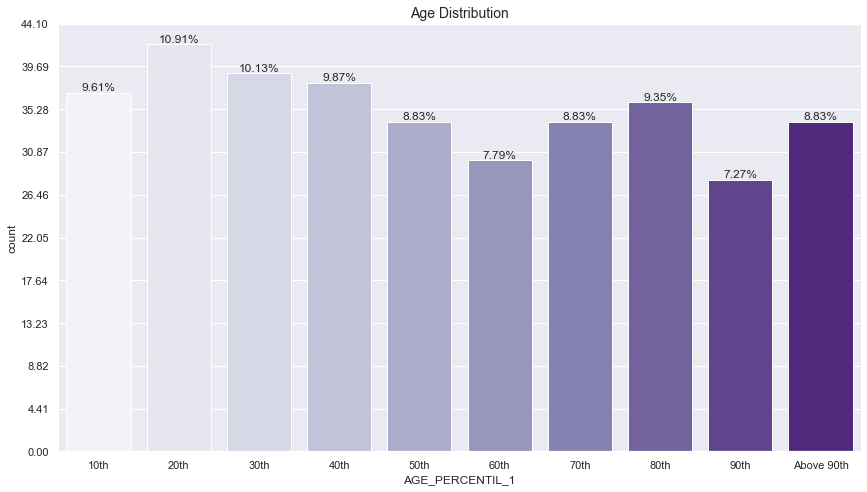

In [93]:
# age distribution
plt.figure(figsize=(12, 7))
plt.title('Age Distribution', fontsize=14)
ax3 = sns.countplot(df_new['AGE_PERCENTIL_1'], palette='Purples', order=[
              "10th", "20th", "30th", "40th", "50th", "60th", "70th", "80th", "90th", "Above 90th"])
plt.tight_layout()

ncount = len(admission_data)

for p in ax3.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax3.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                    ha='center', va='bottom')  # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax3.yaxis.set_major_locator(ticker.LinearLocator(11))

# Summary ages
print('----- AGE COUNT -----')
print('\n')
aggregate(df_new, 'AGE_PERCENTIL_1', '10th', 'AGE 10th')
aggregate(df_new, 'AGE_PERCENTIL_1', '20th', 'AGE 20th')
aggregate(df_new, 'AGE_PERCENTIL_1', '30th', 'AGE 30th')
aggregate(df_new, 'AGE_PERCENTIL_1', '40th', 'AGE 40th')
aggregate(df_new, 'AGE_PERCENTIL_1', '50th', 'AGE 50th')
aggregate(df_new, 'AGE_PERCENTIL_1', '60th', 'AGE 60th')
aggregate(df_new, 'AGE_PERCENTIL_1', '70th', 'AGE 70th')
aggregate(df_new, 'AGE_PERCENTIL_1', '80th', 'AGE 80th')
aggregate(df_new, 'AGE_PERCENTIL_1', '90th', 'AGE 90th')
aggregate(df_new, 'AGE_PERCENTIL_1', 'Above 90th', 'AGE above 90th')


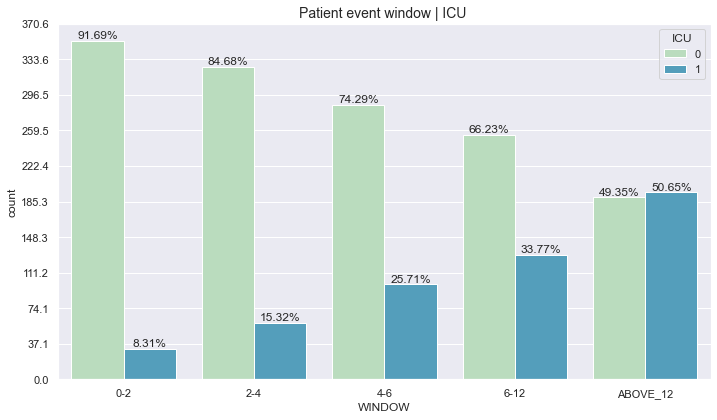

In [94]:
# Patient event window
plt.figure(figsize=(10, 6))
plt.title('Patient event window | ICU ', fontsize=14)
ax4 = sns.countplot(df['WINDOW'], hue='ICU', data=df, palette='GnBu', )
plt.tight_layout()

ncount = len(admission_data)

for p in ax4.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax4.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                 ha='center', va='bottom')  # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax4.yaxis.set_major_locator(ticker.LinearLocator(11))


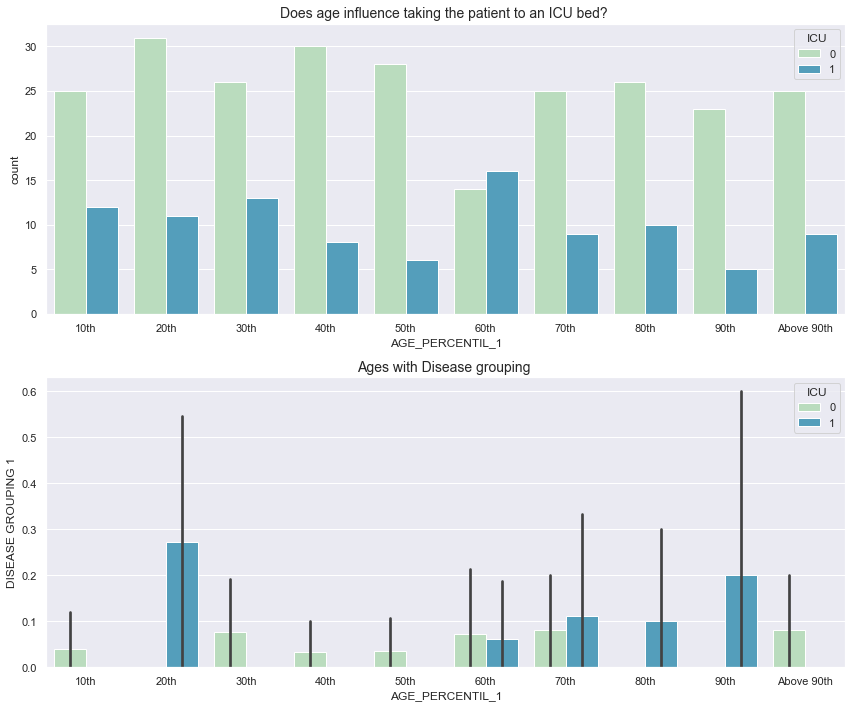

In [103]:
# Does age influence taking the patient to an ICU bed?
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title('Does age influence taking the patient to an ICU bed? ', fontsize=14)
sns.countplot(df_new['AGE_PERCENTIL_1'], hue='ICU', data=df, palette='GnBu', order = ["10th","20th","30th","40th","50th","60th","70th","80th","90th","Above 90th"])

print('\n')

# Ages with Disease Grouping 1
plt.subplot(2,1,2)
plt.title('Ages with Disease grouping ', fontsize=14)
sns.barplot(df_new['AGE_PERCENTIL_1'], y='DISEASE GROUPING 1', hue='ICU', data=df, palette='GnBu', order=[
            "10th", "20th", "30th", "40th", "50th", "60th", "70th", "80th", "90th", "Above 90th"])
plt.tight_layout()



In [104]:
#Identify patient-constant features
col_groups = [x[:-2] for x in df_new.drop(columns = ['PATIENT_VISIT_IDENTIFIER_1', 'ICU']).columns.values]
col_groups = np.unique(col_groups , return_counts = True)

patient_constant_cols = [col_groups[0][x] for x in range(len(col_groups[0])) if col_groups[1][x] == 1]
patient_constant_cols

['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'HTN']

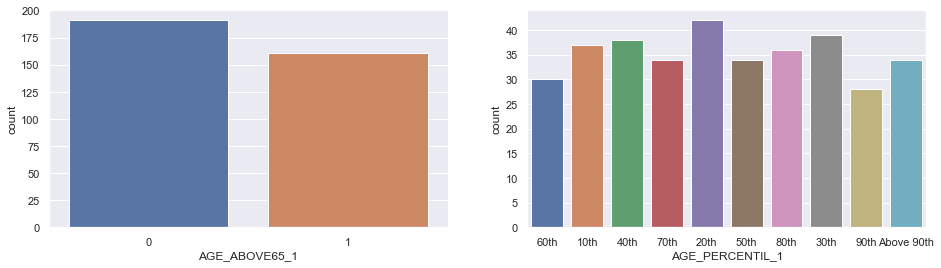

In [105]:
#AGE_ABOVE65 and AGE_PERCENTIL
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.countplot(df_new['AGE_ABOVE65_1'], ax=axis[0])
sns.countplot(df_new['AGE_PERCENTIL_1'], ax=axis[1])
plt.show(fig)


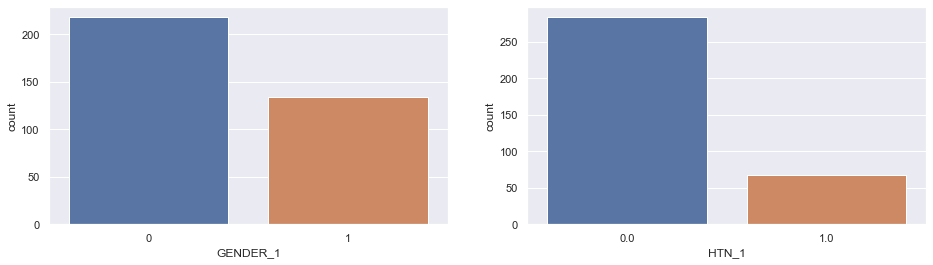

In [106]:
#GENDER and HTN
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.countplot(df_new['GENDER_1'], ax=axis[0])
sns.countplot(df_new['HTN_1'], ax=axis[1])
plt.show(fig)


In [107]:
#Define function for a normalized staked bars plot
def normalized_stacked_bars(data, col, target):

    bottom = [0 for x in data[col].unique()]
    for cls in data[target].unique():
        x_vals, y_vals = np.unique(data[data[target] == cls][col], return_counts = True)
        x_vals = [str(x) for x in x_vals] 
        y_vals = [x / y for x, y in zip(y_vals, np.unique(data[col], return_counts = True)[1])]
        
        plt.bar(x_vals, y_vals, bottom = bottom, color = np.random.rand(1,3))
        bottom = [x + y for x, y in zip(bottom, y_vals)]
    
    plt.legend(np.unique(data[target]), title = target)
    plt.title(col)
    
    return plt.show()

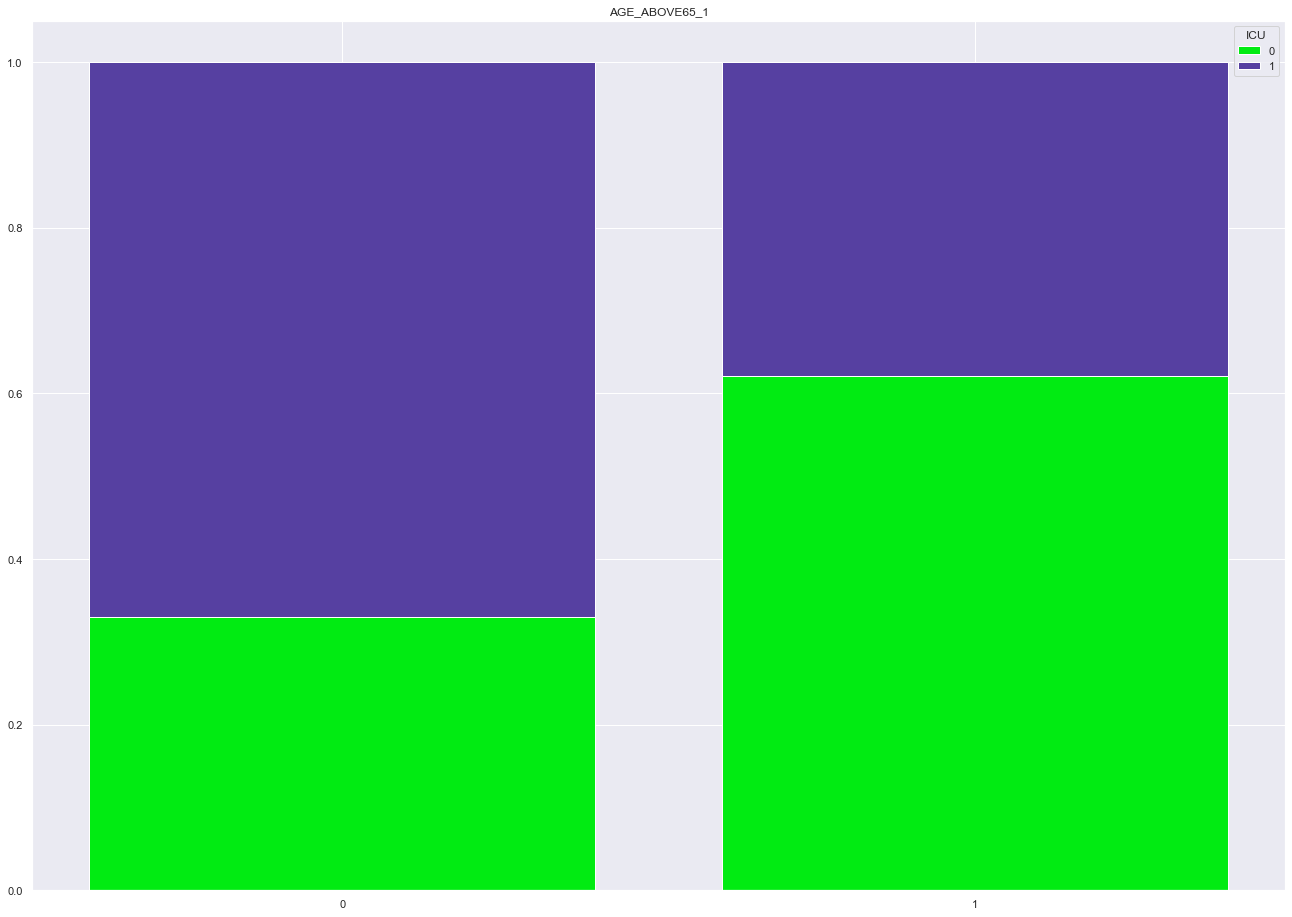

In [108]:
#AGE_ABOVE65
normalized_stacked_bars(df_new, 'AGE_ABOVE65_1', 'ICU')


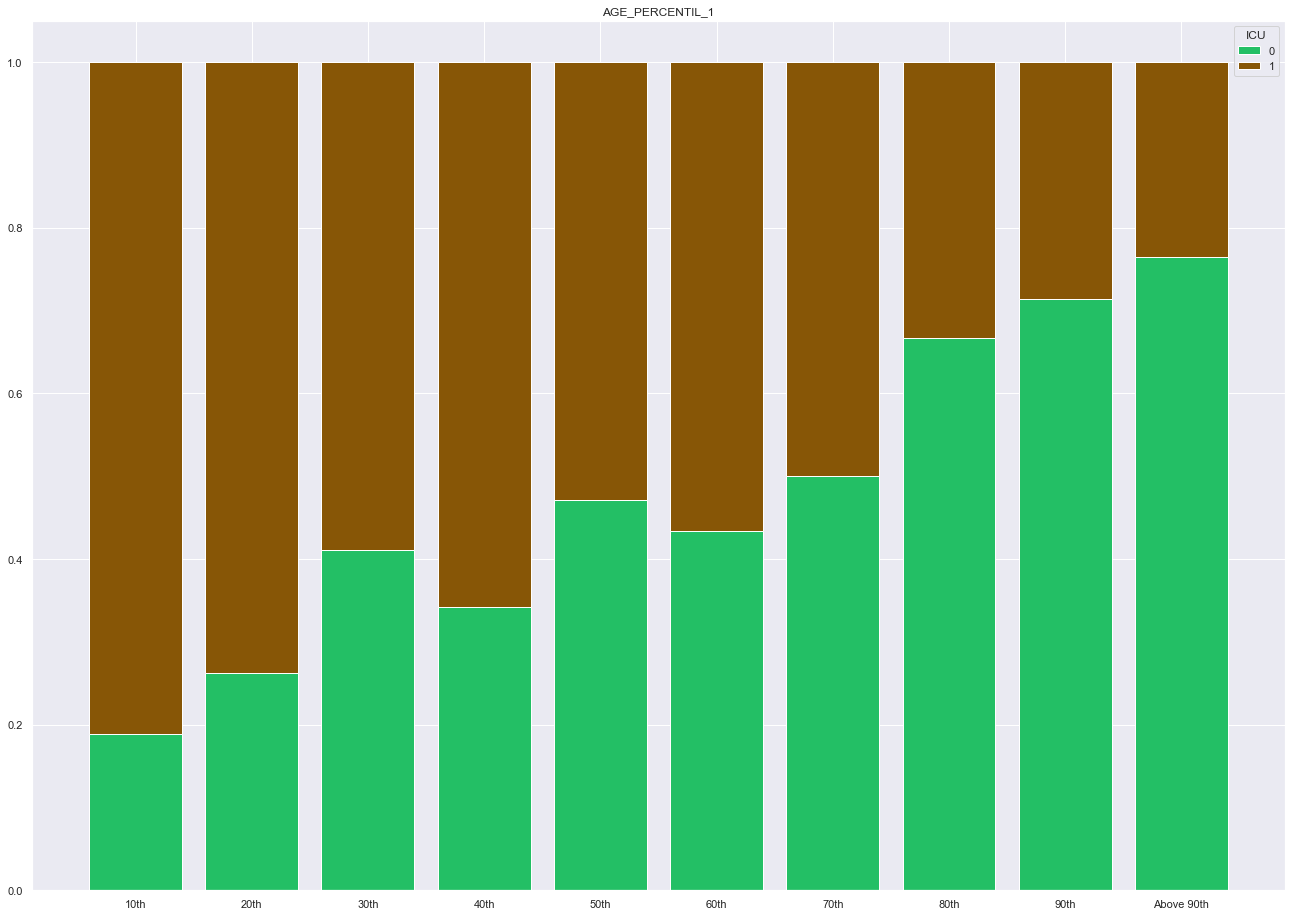

In [109]:
#AGE_PERCENTIL
normalized_stacked_bars(df_new, 'AGE_PERCENTIL_1', 'ICU')


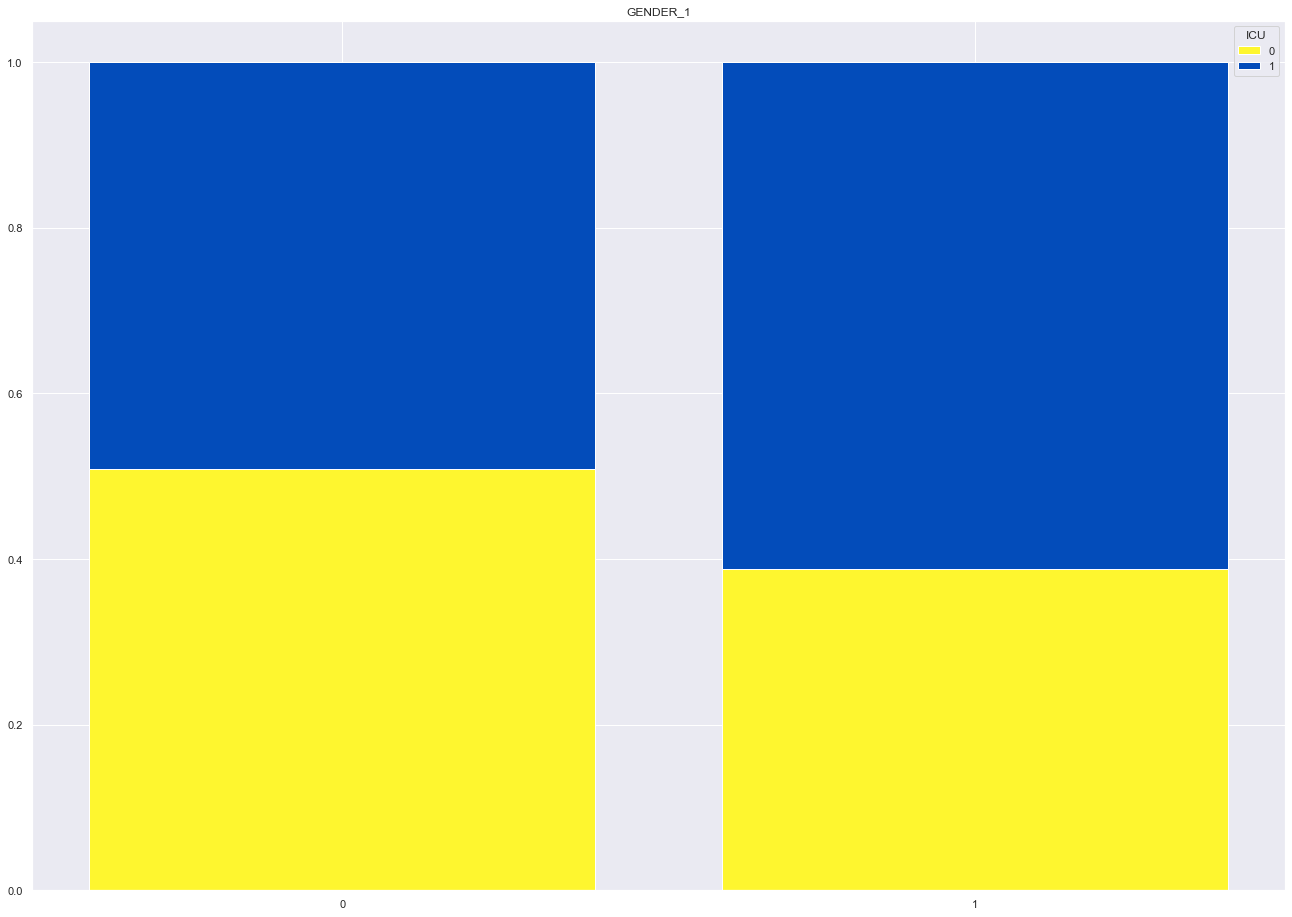

In [110]:
#GENDER
normalized_stacked_bars(df_new, 'GENDER_1', 'ICU')

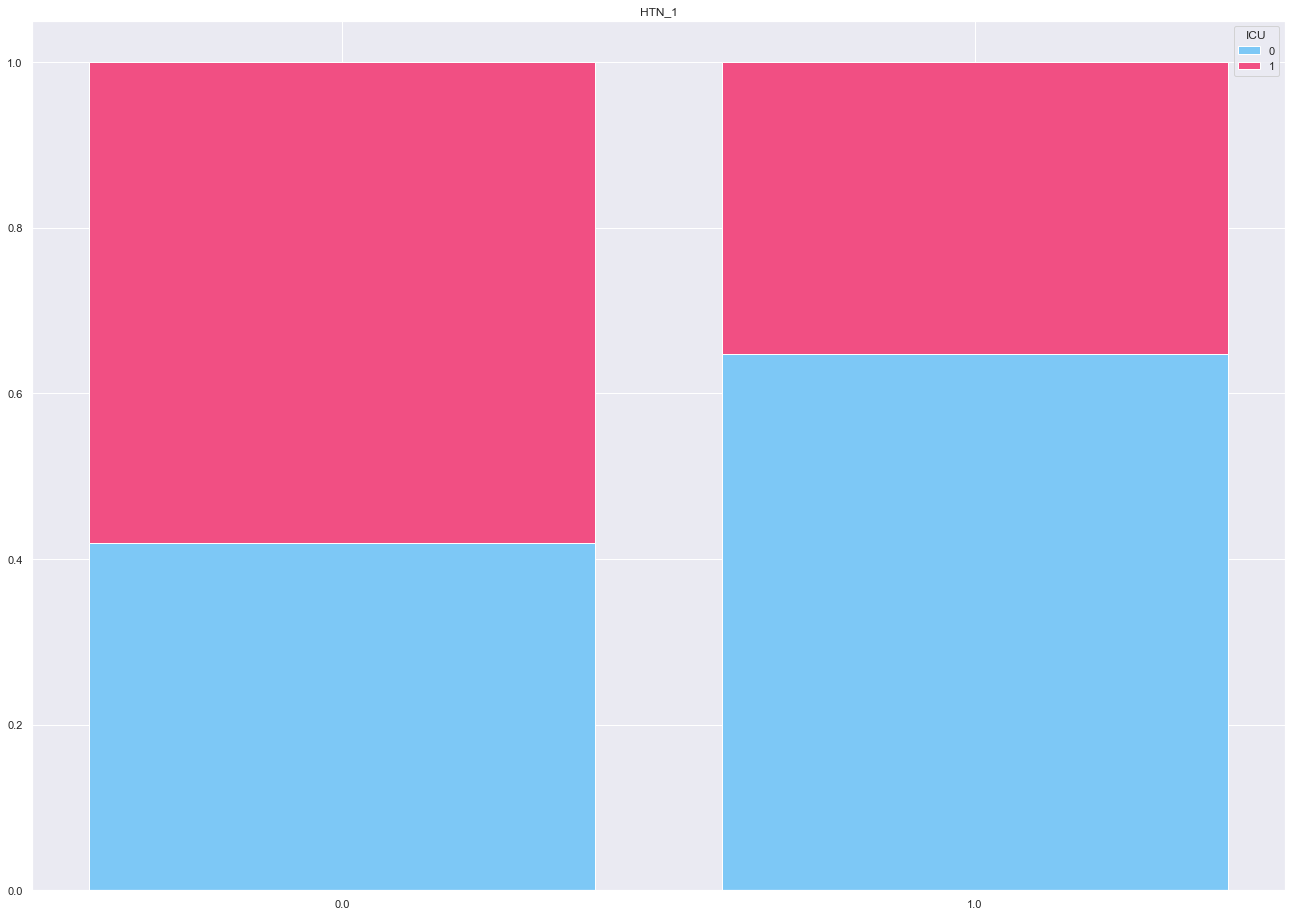

In [111]:
#HTN
normalized_stacked_bars(df_new, 'HTN_1', 'ICU')


In [112]:
#Identifying time variant features and groups of features
patient_constant_cols = [x + '_1' for x in patient_constant_cols]

time_variant_cols = [x for x in df_new.columns.values if x not in patient_constant_cols]
time_variant_cols.remove('PATIENT_VISIT_IDENTIFIER_1')
time_variant_cols.remove('ICU')

time_variant_groups = np.unique([x[:-2] for x in time_variant_cols])
print(time_variant_groups)

['BLOODPRESSURE_DIASTOLIC_DIFF' 'BLOODPRESSURE_DIASTOLIC_DIFF_REL'
 'BLOODPRESSURE_DIASTOLIC_MAX' 'BLOODPRESSURE_DIASTOLIC_MEAN'
 'BLOODPRESSURE_DIASTOLIC_MEDIAN' 'BLOODPRESSURE_DIASTOLIC_MIN'
 'BLOODPRESSURE_SISTOLIC_DIFF' 'BLOODPRESSURE_SISTOLIC_DIFF_REL'
 'BLOODPRESSURE_SISTOLIC_MAX' 'BLOODPRESSURE_SISTOLIC_MEAN'
 'BLOODPRESSURE_SISTOLIC_MEDIAN' 'BLOODPRESSURE_SISTOLIC_MIN'
 'DISEASE GROUPING 1' 'DISEASE GROUPING 2' 'DISEASE GROUPING 3'
 'DISEASE GROUPING 4' 'DISEASE GROUPING 5' 'DISEASE GROUPING 6'
 'HEART_RATE_DIFF' 'HEART_RATE_DIFF_REL' 'HEART_RATE_MAX'
 'HEART_RATE_MEAN' 'HEART_RATE_MEDIAN' 'HEART_RATE_MIN'
 'IMMUNOCOMPROMISED' 'OTHER' 'OXYGEN_SATURATION_DIFF'
 'OXYGEN_SATURATION_DIFF_REL' 'OXYGEN_SATURATION_MAX'
 'OXYGEN_SATURATION_MEAN' 'OXYGEN_SATURATION_MEDIAN'
 'OXYGEN_SATURATION_MIN' 'RESPIRATORY_RATE_DIFF'
 'RESPIRATORY_RATE_DIFF_REL' 'RESPIRATORY_RATE_MAX'
 'RESPIRATORY_RATE_MEAN' 'RESPIRATORY_RATE_MEDIAN' 'RESPIRATORY_RATE_MIN'
 'TEMPERATURE_DIFF' 'TEMPERATURE_DIFF_REL'

In [113]:
#Identify the largers clusters
not_cluster_friendly = ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 
                        'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 
                        'IMMUNOCOMPROMISED', 'OTHER']

clusters = np.unique([x.split('_')[-1] for x in time_variant_groups if x not in not_cluster_friendly])
print(clusters)

['DIFF' 'MAX' 'MEAN' 'MEDIAN' 'MIN' 'REL']


In [114]:
#Define function to compile all values from a feature group
def extract_values_from_group(data, group_name):
    group_cols = [x for x in data.columns.values if x[:-2] == group_name]
    return data[group_cols].values.reshape(-1)

In [115]:
#Define function to plot all feature groups from a cluster
def plot_by_cluster(data, col_groups, cluster_name):
    #Identify groups to be ploted
    groups = [x for x in col_groups if x[-len(cluster_name):] == cluster_name]
    
    #Compute dimensions for subplots
    ncols = 2
    nrows = int(len(groups) / 2) if len(groups) % 2 == 0 else np.floor(len(groups) / 2) + 1

    #Plot groups
    fig, axis = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 3*nrows))
    for i, group in enumerate(groups):
        row = int(i / 2)
        col = 0 if i%2 == 0 else 1
        if data[group + '_1'].dtype == np.int64:
            sns.countplot(extract_values_from_group(data, group), ax = axis[row, col]).set_title(group)
        else:
            sns.distplot(extract_values_from_group(data, group), ax = axis[row, col]).set_title(group)
    
    fig.tight_layout()
    return plt.show() 

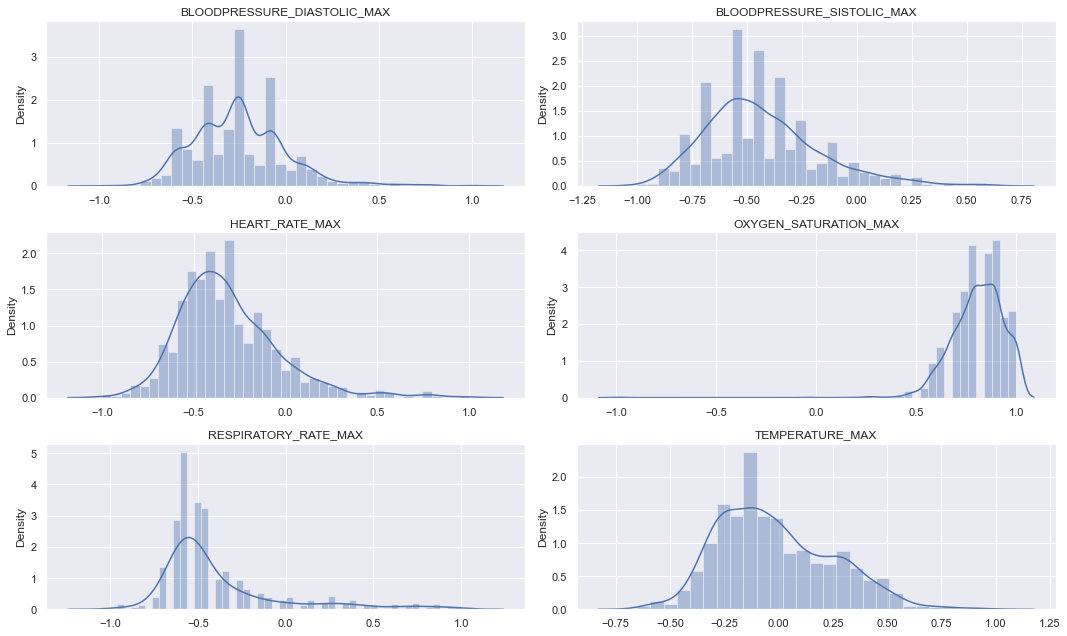

In [116]:
# MAX
plot_by_cluster(df_new, time_variant_groups, 'MAX')

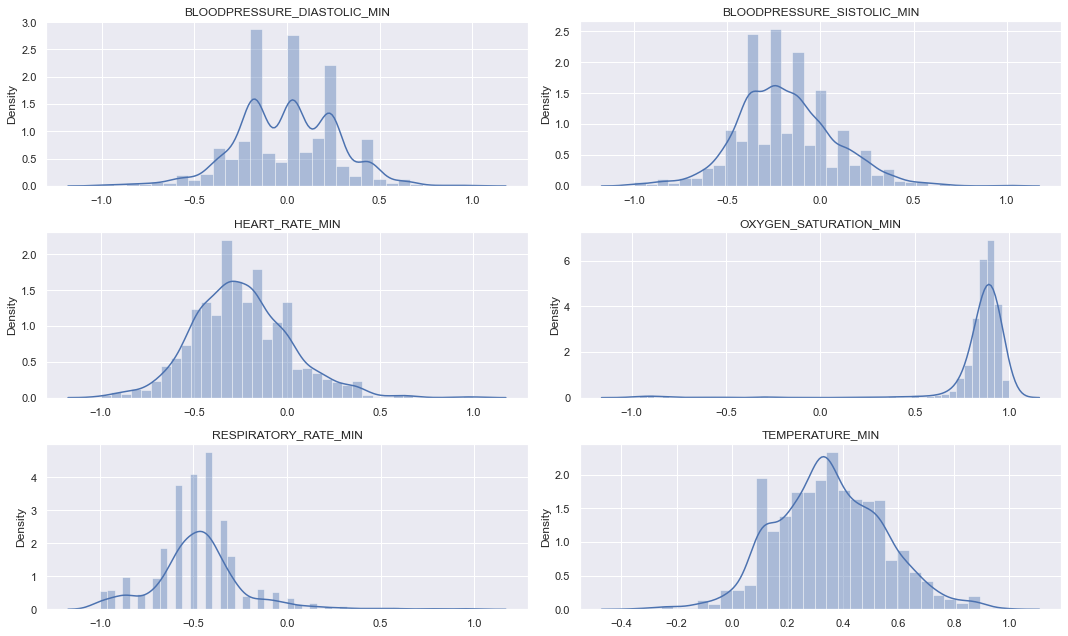

In [117]:
plot_by_cluster(df_new, time_variant_groups, 'MIN')

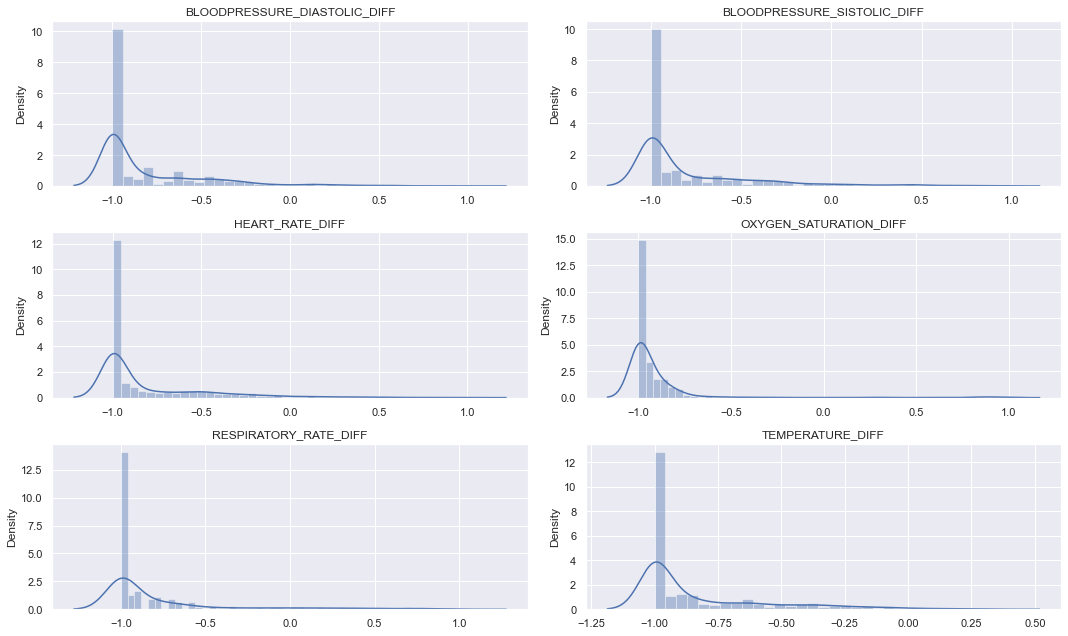

In [118]:
plot_by_cluster(df_new, time_variant_groups, 'DIFF')


In [119]:
#Define function to show grafically the correlation between ICU admission and feature change over time
def feature_target_plot(data, group, target):
    group_cols = [x for x in data.columns if x[:len(group)] == group]
    summarized_data = data.groupby(
        by='PATIENT_VISIT_IDENTIFIER_1').max()[group_cols]
    data_change = summarized_data.max(axis=1) - summarized_data.min(axis=1)

    change_rows = data_change[data_change != 0].index
    no_change_rows = data_change[data_change == 0].index

    bot = [0, 0]
    for value in data[target].unique():
        y_vals = [len(data[data[target] == value].filter(change_rows, axis='index')) / len(change_rows),
                  len(data[data[target] == value].filter(no_change_rows, axis='index')) / len(no_change_rows)]
        x_vals = ['Change', 'No Change']

        plt.bar(x_vals, y_vals, bottom=bot, color=np.random.rand(1, 3))
        bot = [x + y for x, y in zip(bot, y_vals)]

    plt.legend(data[target].unique(), title=target)

    return plt.show()


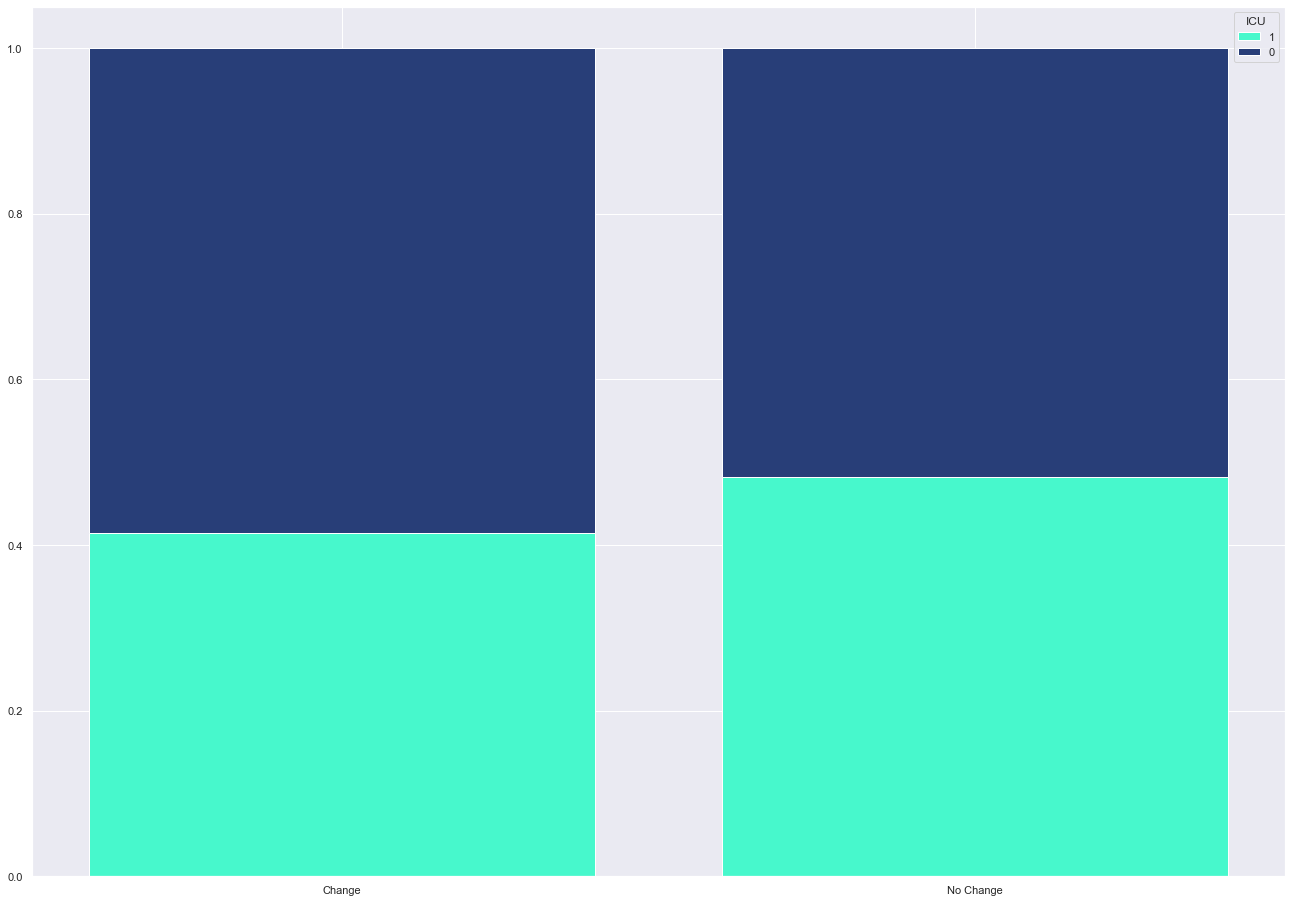

In [120]:
feature_target_plot(df_new, 'OTHER', 'ICU')


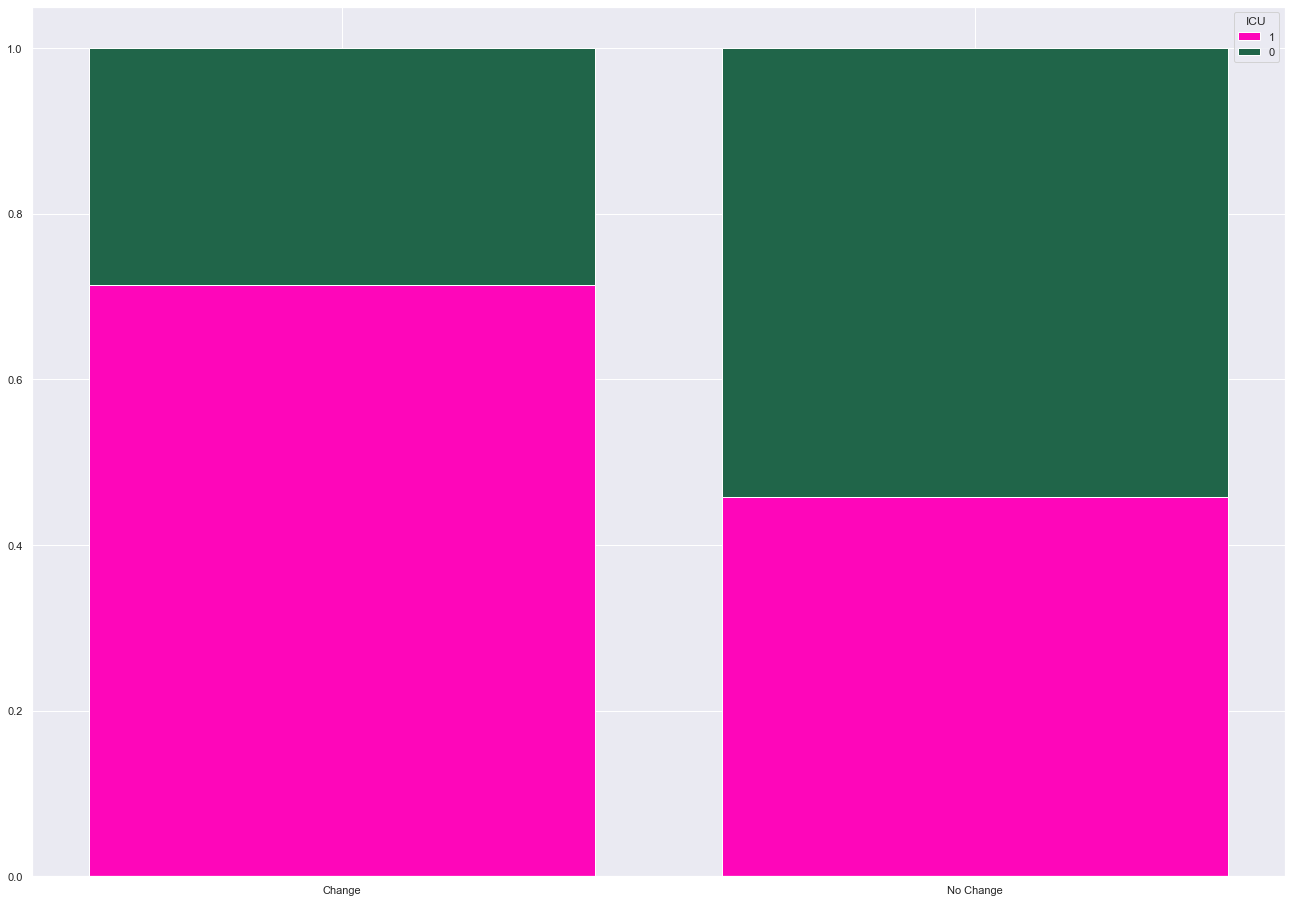

In [121]:
feature_target_plot(df_new, 'IMMUNOCOMPROMISED', 'ICU')


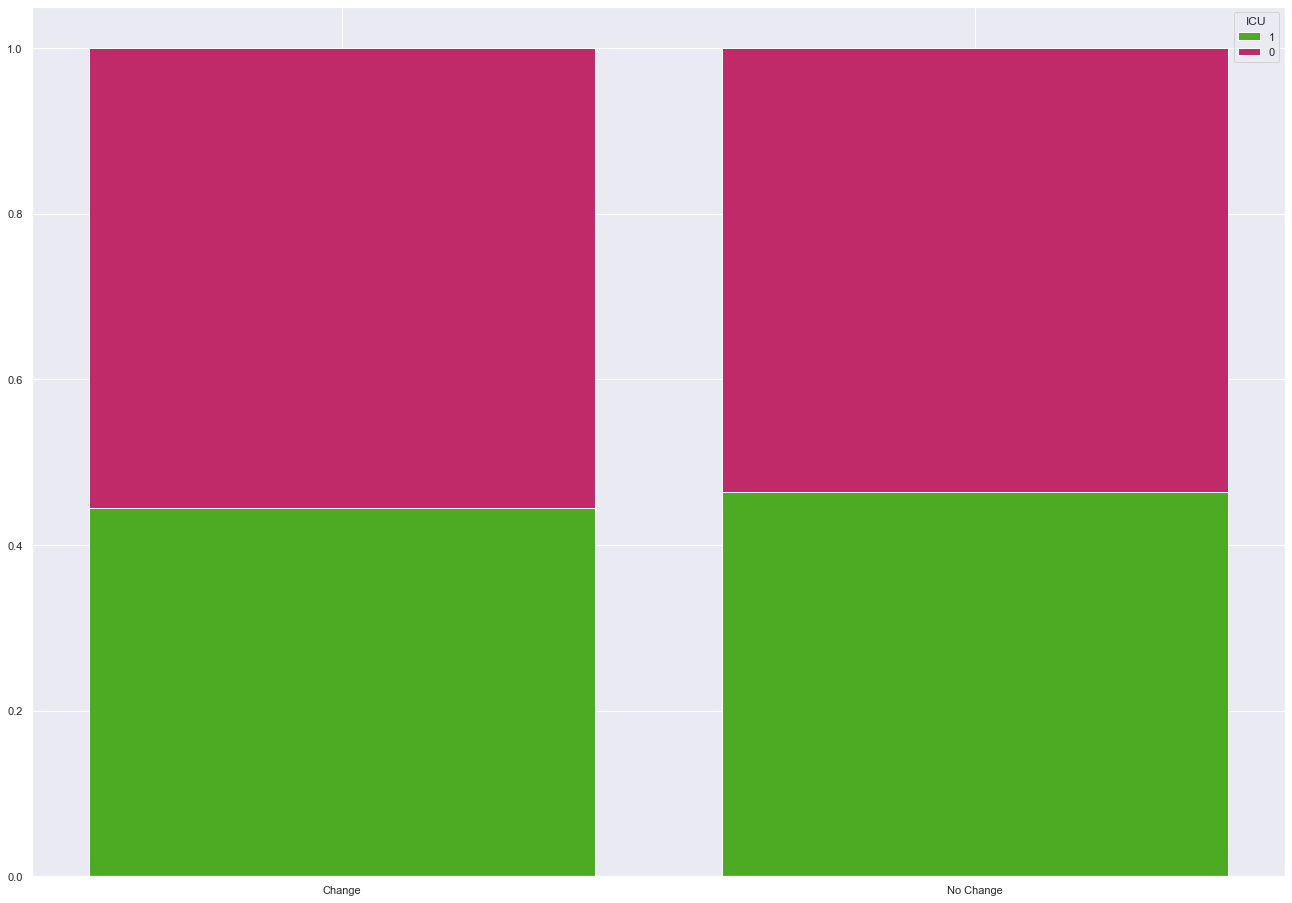

In [122]:
feature_target_plot(df_new, 'DISEASE GROUPING 1', 'ICU')


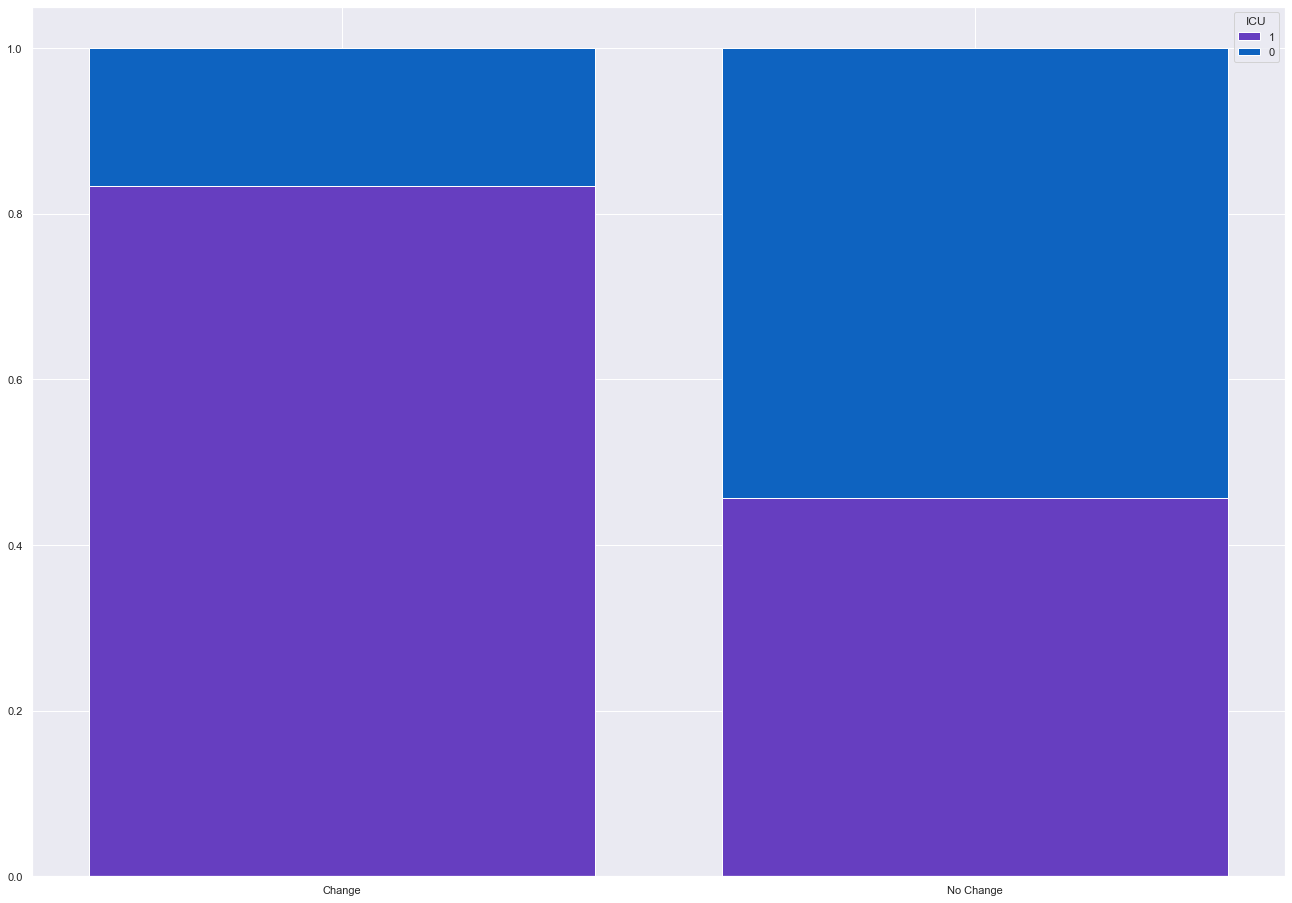

In [123]:
feature_target_plot(df_new, 'DISEASE GROUPING 2', 'ICU')


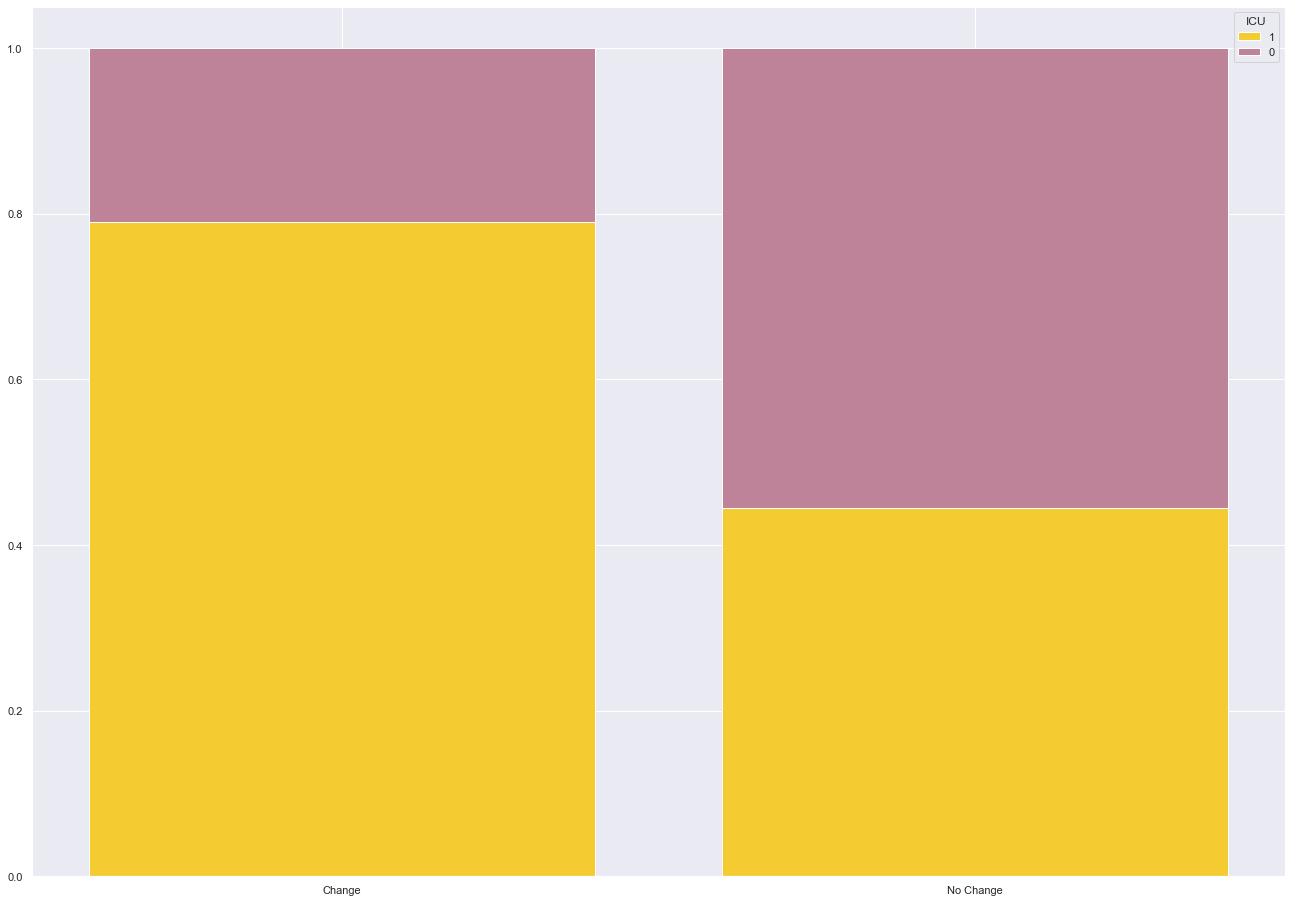

In [124]:
feature_target_plot(df_new, 'DISEASE GROUPING 3', 'ICU')


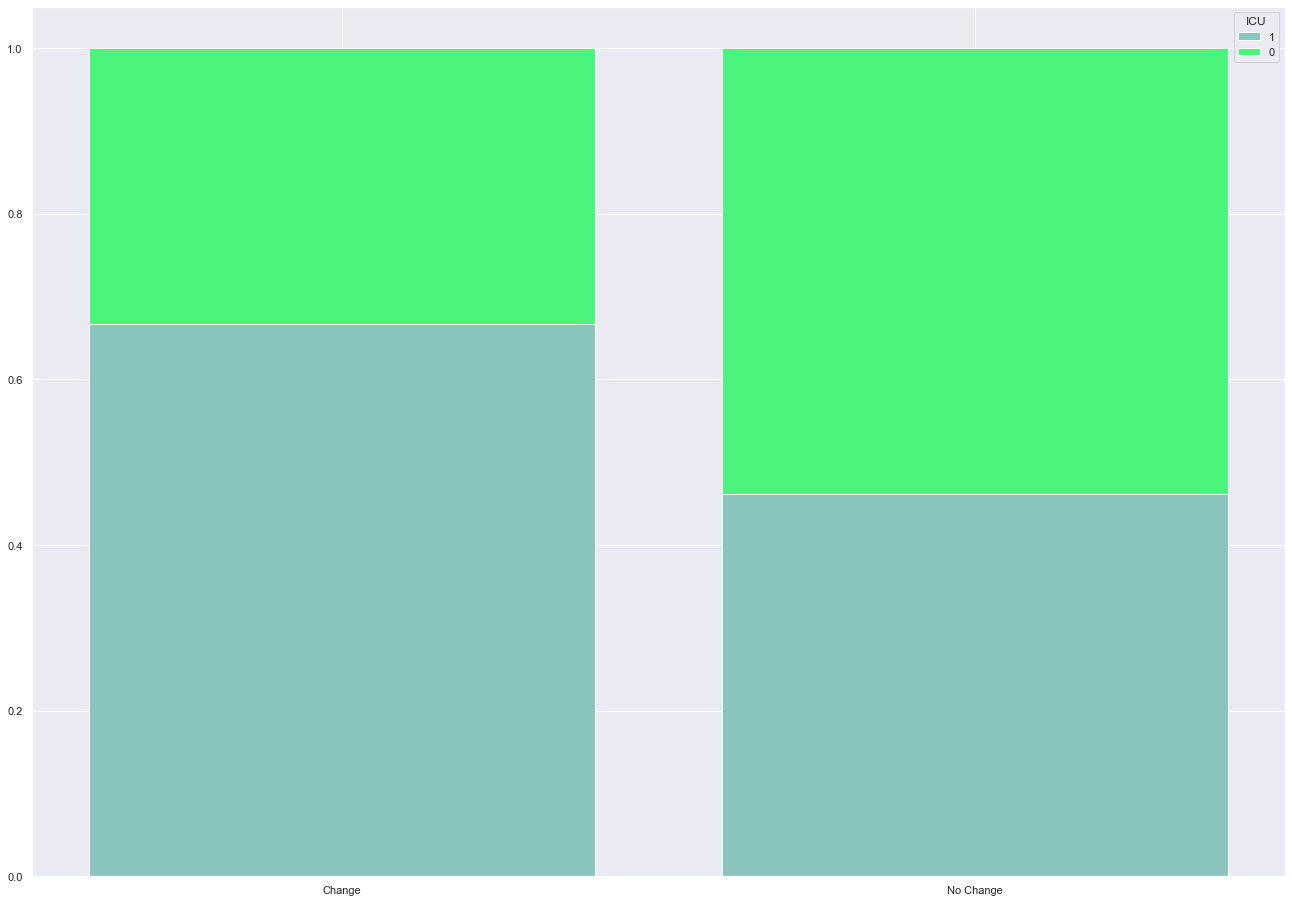

In [125]:
feature_target_plot(df_new, 'DISEASE GROUPING 4', 'ICU')


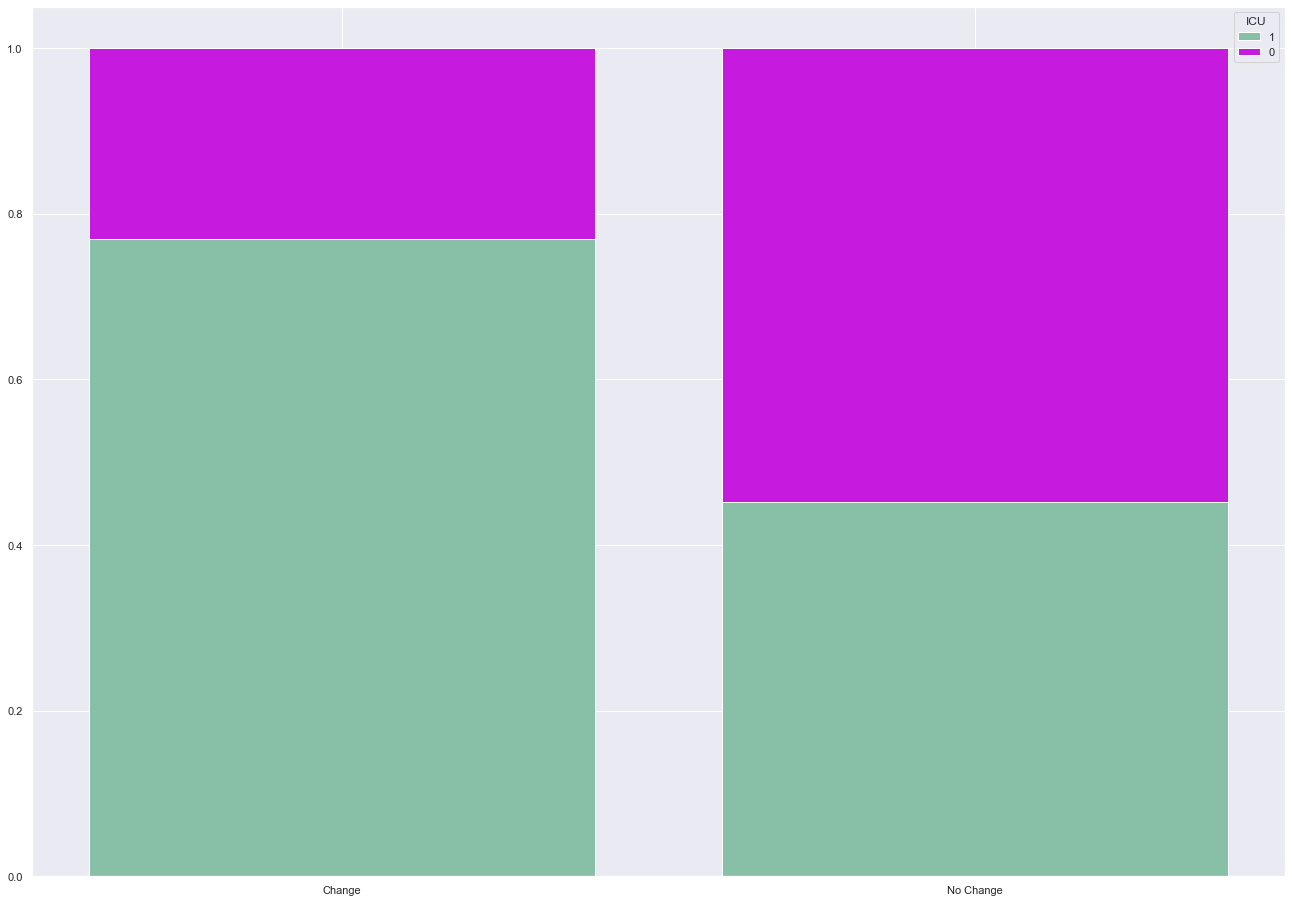

In [126]:
feature_target_plot(df_new, 'DISEASE GROUPING 5', 'ICU')


In [127]:
#Remove all data take after window 1
model_1_cols = [x for x in df_new.columns if x[-1] not in [str(y) for y in range(2,6)]]
df_new_1 = df_new[model_1_cols]

df_new_1.head()

,AGE_ABOVE65_1,AGE_PERCENTIL_1,GENDER_1,HTN_1,PATIENT_VISIT_IDENTIFIER_1,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,BLOODPRESSURE_DIASTOLIC_MAX_1,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,BLOODPRESSURE_DIASTOLIC_MIN_1,BLOODPRESSURE_SISTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,BLOODPRESSURE_SISTOLIC_MAX_1,BLOODPRESSURE_SISTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,BLOODPRESSURE_SISTOLIC_MIN_1,DISEASE GROUPING 1_1,DISEASE GROUPING 2_1,DISEASE GROUPING 3_1,DISEASE GROUPING 4_1,DISEASE GROUPING 5_1,DISEASE GROUPING 6_1,HEART_RATE_DIFF_1,HEART_RATE_DIFF_REL_1,HEART_RATE_MAX_1,HEART_RATE_MEAN_1,HEART_RATE_MEDIAN_1,HEART_RATE_MIN_1,IMMUNOCOMPROMISED_1,OTHER_1,OXYGEN_SATURATION_DIFF_1,OXYGEN_SATURATION_DIFF_REL_1,OXYGEN_SATURATION_MAX_1,OXYGEN_SATURATION_MEAN_1,OXYGEN_SATURATION_MEDIAN_1,OXYGEN_SATURATION_MIN_1,RESPIRATORY_RATE_DIFF_1,RESPIRATORY_RATE_DIFF_REL_1,RESPIRATORY_RATE_MAX_1,RESPIRATORY_RATE_MEAN_1,RESPIRATORY_RATE_MEDIAN_1,RESPIRATORY_RATE_MIN_1,TEMPERATURE_DIFF_1,TEMPERATURE_DIFF_REL_1,TEMPERATURE_MAX_1,TEMPERATURE_MEAN_1,TEMPERATURE_MEDIAN_1,TEMPERATURE_MIN_1,ICU
0,1,60th,0,0.0,0,-1.000000,-1.000000,-0.247863,0.086420,0.086420,0.237113,-1.000000,-1.000000,-0.459459,-0.230769,-0.230769,0.0000,0.0,0.0,0.0,0.0,1.0,1.0,-1.000000,-1.000000,-0.432836,-0.283019,-0.283019,-0.162393,0.0,1.0,-1.000000,-1.000000,0.736842,0.736842,0.736842,0.898990,-1.000000,-1.000000,-0.636364,-0.593220,-0.586207,-0.500000,-1.000000,-1.000000,-0.420290,-0.285714,-0.285714,0.208791,1
2,0,10th,0,0.0,2,-0.547826,-0.515528,-0.435897,-0.489712,-0.506173,-0.525773,-0.533742,-0.351328,-0.491892,-0.685470,-0.815385,-0.5125,0.0,0.0,0.0,0.0,0.0,0.0,-0.603053,-0.747001,0.000000,-0.048218,-0.056604,-0.111111,0.0,1.0,-0.959596,-0.961262,1.000000,0.935673,0.947368,0.959596,-0.764706,-0.756272,-0.575758,-0.645951,-0.517241,-0.714286,-1.000000,-1.000000,0.101449,0.357143,0.357143,0.604396,1
3,0,40th,1,0.0,3,-1.000000,-1.000000,-0.299145,0.012346,0.012346,0.175258,-1.000000,-1.000000,-0.556757,-0.369231,-0.369231,-0.1125,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-0.626866,-0.528302,-0.528302,-0.384615,1.0,1.0,-1.000000,-1.000000,0.684211,0.684211,0.684211,0.878788,-1.000000,-1.000000,-0.515152,-0.457627,-0.448276,-0.357143,-1.000000,-1.000000,-0.420290,-0.285714,-0.285714,0.208791,0
4,0,10th,0,0.0,4,-1.000000,-1.000000,-0.076923,0.333333,0.333333,0.443299,-0.877301,-0.883669,-0.351351,-0.153846,-0.153846,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,-0.923664,-0.956805,-0.044776,0.160377,0.160377,0.196581,0.0,1.0,-0.979798,-0.980333,0.894737,0.868421,0.868421,0.939394,-0.882353,-0.870968,-0.575758,-0.593220,-0.586207,-0.571429,-0.952381,-0.953536,0.072464,0.285714,0.285714,0.538462,0
5,0,10th,0,0.0,5,-0.826087,-0.860870,-0.247863,-0.037037,-0.037037,0.030928,-0.754601,-0.714460,-0.567568,-0.538462,-0.538462,-0.3750,0.0,0.0,0.0,0.0,0.0,0.0,-0.984733,-0.986481,-0.626866,-0.537736,-0.537736,-0.401709,0.0,1.0,-0.979798,-0.980129,0.842105,0.815789,0.815789,0.919192,-1.000000,-1.000000,-0.575758,-0.525424,-0.517241,-0.428571,-0.976190,-0.975891,-0.333333,-0.196429,-0.196429,0.252747,0


In [128]:
df_new_1

,AGE_ABOVE65_1,AGE_PERCENTIL_1,GENDER_1,HTN_1,PATIENT_VISIT_IDENTIFIER_1,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,BLOODPRESSURE_DIASTOLIC_MAX_1,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,BLOODPRESSURE_DIASTOLIC_MIN_1,BLOODPRESSURE_SISTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,BLOODPRESSURE_SISTOLIC_MAX_1,BLOODPRESSURE_SISTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,BLOODPRESSURE_SISTOLIC_MIN_1,DISEASE GROUPING 1_1,DISEASE GROUPING 2_1,DISEASE GROUPING 3_1,DISEASE GROUPING 4_1,DISEASE GROUPING 5_1,DISEASE GROUPING 6_1,HEART_RATE_DIFF_1,HEART_RATE_DIFF_REL_1,HEART_RATE_MAX_1,HEART_RATE_MEAN_1,HEART_RATE_MEDIAN_1,HEART_RATE_MIN_1,IMMUNOCOMPROMISED_1,OTHER_1,OXYGEN_SATURATION_DIFF_1,OXYGEN_SATURATION_DIFF_REL_1,OXYGEN_SATURATION_MAX_1,OXYGEN_SATURATION_MEAN_1,OXYGEN_SATURATION_MEDIAN_1,OXYGEN_SATURATION_MIN_1,RESPIRATORY_RATE_DIFF_1,RESPIRATORY_RATE_DIFF_REL_1,RESPIRATORY_RATE_MAX_1,RESPIRATORY_RATE_MEAN_1,RESPIRATORY_RATE_MEDIAN_1,RESPIRATORY_RATE_MIN_1,TEMPERATURE_DIFF_1,TEMPERATURE_DIFF_REL_1,TEMPERATURE_MAX_1,TEMPERATURE_MEAN_1,TEMPERATURE_MEDIAN_1,TEMPERATURE_MIN_1,ICU
0,1,60th,0,0.0,0,-1.000000,-1.000000,-0.247863,0.086420,0.086420,0.237113,-1.000000,-1.000000,-0.459459,-0.230769,-0.230769,0.0000,0.0,0.0,0.0,0.0,1.0,1.0,-1.000000,-1.000000,-0.432836,-0.283019,-0.283019,-0.162393,0.0,1.0,-1.000000,-1.000000,0.736842,0.736842,0.736842,0.898990,-1.000000,-1.000000,-0.636364,-0.593220,-0.586207,-0.500000,-1.000000,-1.000000,-0.420290,-0.285714,-0.285714,0.208791,1
2,0,10th,0,0.0,2,-0.547826,-0.515528,-0.435897,-0.489712,-0.506173,-0.525773,-0.533742,-0.351328,-0.491892,-0.685470,-0.815385,-0.5125,0.0,0.0,0.0,0.0,0.0,0.0,-0.603053,-0.747001,0.000000,-0.048218,-0.056604,-0.111111,0.0,1.0,-0.959596,-0.961262,1.000000,0.935673,0.947368,0.959596,-0.764706,-0.756272,-0.575758,-0.645951,-0.517241,-0.714286,-1.000000,-1.000000,0.101449,0.357143,0.357143,0.604396,1
3,0,40th,1,0.0,3,-1.000000,-1.000000,-0.299145,0.012346,0.012346,0.175258,-1.000000,-1.000000,-0.556757,-0.369231,-0.369231,-0.1125,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-0.626866,-0.528302,-0.528302,-0.384615,1.0,1.0,-1.000000,-1.000000,0.684211,0.684211,0.684211,0.878788,-1.000000,-1.000000,-0.515152,-0.457627,-0.448276,-0.357143,-1.000000,-1.000000,-0.420290,-0.285714,-0.285714,0.208791,0
4,0,10th,0,0.0,4,-1.000000,-1.000000,-0.076923,0.333333,0.333333,0.443299,-0.877301,-0.883669,-0.351351,-0.153846,-0.153846,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,-0.923664,-0.956805,-0.044776,0.160377,0.160377,0.196581,0.0,1.0,-0.979798,-0.980333,0.894737,0.868421,0.868421,0.939394,-0.882353,-0.870968,-0.575758,-0.593220,-0.586207,-0.571429,-0.952381,-0.953536,0.072464,0.285714,0.285714,0.538462,0
5,0,10th,0,0.0,5,-0.826087,-0.860870,-0.247863,-0.037037,-0.037037,0.030928,-0.754601,-0.714460,-0.567568,-0.538462,-0.538462,-0.3750,0.0,0.0,0.0,0.0,0.0,0.0,-0.984733,-0.986481,-0.626866,-0.537736,-0.537736,-0.401709,0.0,1.0,-0.979798,-0.980129,0.842105,0.815789,0.815789,0.919192,-1.000000,-1.000000,-0.575758,-0.525424,-0.517241,-0.428571,-0.976190,-0.975891,-0.333333,-0.196429,-0.196429,0.252747,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,40th,1,0.0,380,-1.000000,-1.000000,-0.418803,-0.160494,-0.160494,0.030928,-1.000000,-1.000000,-0.783784,-0.692308,-0.692308,-0.3750,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,0.059701,0.339623,0.339623,0.401709,1.0,1.0,-1.000000,-1.000000,0.736842,0.736842,0.736842,0.898990,-1.000000,-1.000000,-0.515152,-0.457627,-0.448276,-0.357143,-1.000000,-1.000000,-0.072464,0.142857,0.142857,0.472527,1
381,1,Above 90th,0,0.0,381,-1.000000,-1.000000,-0.589744,-0.407407,-0.407407,-0.175258,-1.000000,-1.000000,-0.783784,-0.692308,-0.692308,-0.3750,0.0,0.0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-0.432836,-0.283019,-0.283019,-0.162393,1.0,1.0,-1.000000,-1.000000,0.5

<Figure size 864x720 with 0 Axes>

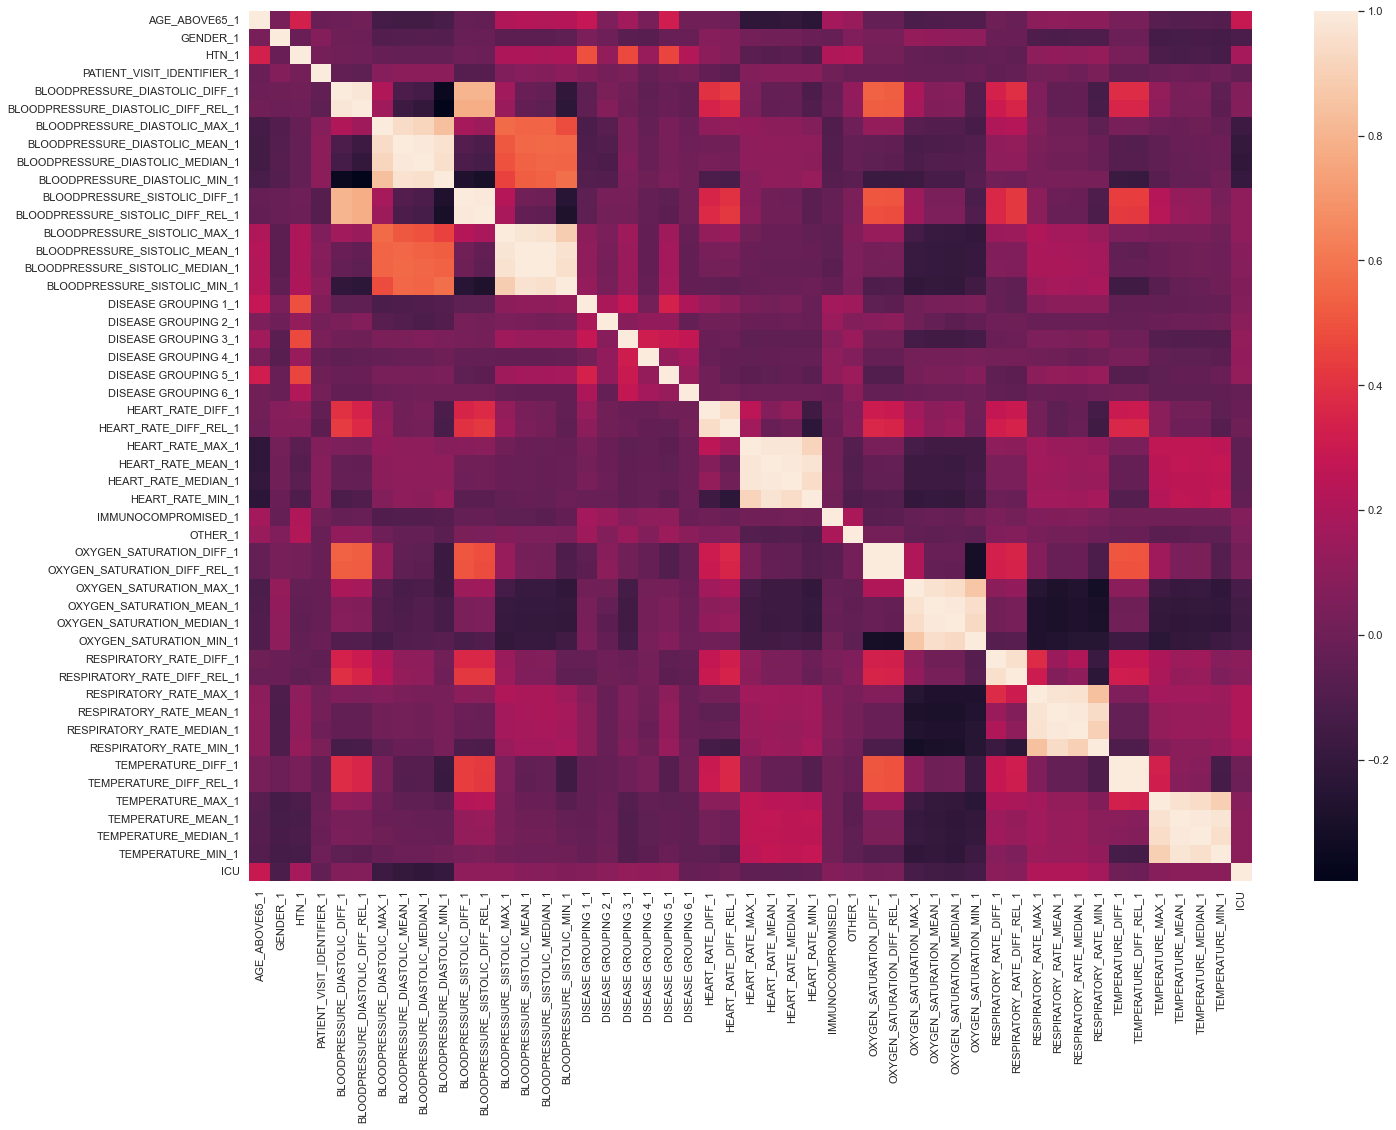

<Figure size 864x720 with 0 Axes>

In [129]:
# Compute Pearson Correlation
df_new_1_corr = df_new_1.corr()

sns.heatmap(df_new_1_corr)
plt.figure(figsize = (12,10))

In [130]:
stacked_df_new_1_corr = rank_correlation_score(df_new_1)
stacked_df_new_1_corr

,Feature_1,Feature_2,Pearson_Correlation
2101,TEMPERATURE_DIFF_1,TEMPERATURE_DIFF_REL_1,0.999444
1501,OXYGEN_SATURATION_DIFF_1,OXYGEN_SATURATION_DIFF_REL_1,0.998889
651,BLOODPRESSURE_SISTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,0.996952
1251,HEART_RATE_MEAN_1,HEART_RATE_MEDIAN_1,0.993374
2251,TEMPERATURE_MEAN_1,TEMPERATURE_MEDIAN_1,0.993236
...,...,...,...
733,BLOODPRESSURE_SISTOLIC_MEDIAN_1,TEMPERATURE_MIN_1,0.000809
924,DISEASE GROUPING 3_1,TEMPERATURE_DIFF_1,0.000746
516,BLOODPRESSURE_SISTOLIC_DIFF_1,HEART_RATE_MEDIAN_1,0.000576
194,PATIENT_VISIT_IDENTIFIER_1,TEMPERATURE_MIN_1,0.000536


In [131]:
#Filter very strong correlations
stacked_df_new_1_corr[stacked_df_new_1_corr['Pearson_Correlation'] > 0.99]

,Feature_1,Feature_2,Pearson_Correlation
2101,TEMPERATURE_DIFF_1,TEMPERATURE_DIFF_REL_1,0.999444
1501,OXYGEN_SATURATION_DIFF_1,OXYGEN_SATURATION_DIFF_REL_1,0.998889
651,BLOODPRESSURE_SISTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,0.996952
1251,HEART_RATE_MEAN_1,HEART_RATE_MEDIAN_1,0.993374
2251,TEMPERATURE_MEAN_1,TEMPERATURE_MEDIAN_1,0.993236
351,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,0.992260
1651,OXYGEN_SATURATION_MEAN_1,OXYGEN_SATURATION_MEDIAN_1,0.990731
501,BLOODPRESSURE_SISTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,0.990595


In [132]:
#Investigate MEAN/MEDIAN correlations
stacked_df_new_1_corr['MEASURE_FEATURE_1'] = [x.split('_')[0] for x in stacked_df_new_1_corr['Feature_1']]
stacked_df_new_1_corr['MEASURE_FEATURE_2'] = [x.split('_')[0] for x in stacked_df_new_1_corr['Feature_2']]
stacked_df_new_1_corr['TYPE_FEATURE_1'] = [x.split('_')[-2] for x in stacked_df_new_1_corr['Feature_1']]
stacked_df_new_1_corr['TYPE_FEATURE_2'] = [x.split('_')[-2] for x in stacked_df_new_1_corr['Feature_2']]

mean_median_corr = stacked_df_new_1_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
mean_median_corr = mean_median_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_1'].isin(['MEDIAN', 'MEAN'])]
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_2'].isin(['MEDIAN', 'MEAN'])]

relevant_cols = ['Feature_1', 'Feature_2', 'Pearson_Correlation']
mean_median_corr[relevant_cols]

,Feature_1,Feature_2,Pearson_Correlation
651,BLOODPRESSURE_SISTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,0.996952
1251,HEART_RATE_MEAN_1,HEART_RATE_MEDIAN_1,0.993374
2251,TEMPERATURE_MEAN_1,TEMPERATURE_MEDIAN_1,0.993236
351,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,0.992260
1651,OXYGEN_SATURATION_MEAN_1,OXYGEN_SATURATION_MEDIAN_1,0.990731
1951,RESPIRATORY_RATE_MEAN_1,RESPIRATORY_RATE_MEDIAN_1,0.989124
357,BLOODPRESSURE_DIASTOLIC_MEAN_1,BLOODPRESSURE_SISTOLIC_MEDIAN_1,0.560540
405,BLOODPRESSURE_DIASTOLIC_MEDIAN_1,BLOODPRESSURE_SISTOLIC_MEAN_1,0.539823


In [133]:
#List columns to be removed
cols_to_remove = ["BLOODPRESSURE_SISTOLIC_MEDIAN_1","HEART_RATE_MEDIAN_1","TEMPERATURE_MEDIAN_1",
                  "BLOODPRESSURE_DIASTOLIC_MEDIAN_1","OXYGEN_SATURATION_MEDIAN_1",
                  "RESPIRATORY_RATE_MEDIAN_1"]

In [134]:
#Investigate DIFF/DIFF_REL correlations
diff_corr = stacked_df_new_1_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
diff_corr = diff_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_1'].isin(['DIFF', 'REL'])]
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_2'].isin(['DIFF', 'REL'])]

diff_corr[relevant_cols]

,Feature_1,Feature_2,Pearson_Correlation
2101,TEMPERATURE_DIFF_1,TEMPERATURE_DIFF_REL_1,0.999444
1501,OXYGEN_SATURATION_DIFF_1,OXYGEN_SATURATION_DIFF_REL_1,0.998889
501,BLOODPRESSURE_SISTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,0.990595
201,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,0.978508
1801,RESPIRATORY_RATE_DIFF_1,RESPIRATORY_RATE_DIFF_REL_1,0.961739
1101,HEART_RATE_DIFF_1,HEART_RATE_DIFF_REL_1,0.949914
207,BLOODPRESSURE_DIASTOLIC_DIFF_1,BLOODPRESSURE_SISTOLIC_DIFF_REL_1,0.799433
255,BLOODPRESSURE_DIASTOLIC_DIFF_REL_1,BLOODPRESSURE_SISTOLIC_DIFF_1,0.777548


In [135]:
#Add columns to the remove list
cols_to_remove.extend(["TEMPERATURE_DIFF_REL_1","OXYGEN_SATURATION_DIFF_REL_1",
                       "BLOODPRESSURE_SISTOLIC_DIFF_REL_1","BLOODPRESSURE_DIASTOLIC_DIFF_REL_1",
                       "RESPIRATORY_RATE_DIFF_REL_1","HEART_RATE_DIFF_REL_1"])

In [136]:
# Sort valued correlations valued to the target
df_new_1 = df_new_1.drop(columns = cols_to_remove)
df_new_1_target_corr = abs(df_new_1.corr())["ICU"]

df_new_1_target_corr[df_new_1_target_corr < 1].sort_values(ascending = False)

AGE_ABOVE65_1                     0.291010
RESPIRATORY_RATE_MAX_1            0.213938
RESPIRATORY_RATE_MEAN_1           0.207911
BLOODPRESSURE_DIASTOLIC_MEAN_1    0.201210
BLOODPRESSURE_DIASTOLIC_MIN_1     0.195703
HTN_1                             0.180555
RESPIRATORY_RATE_MIN_1            0.173043
BLOODPRESSURE_DIASTOLIC_MAX_1     0.166832
OXYGEN_SATURATION_MEAN_1          0.147612
OXYGEN_SATURATION_MIN_1           0.139034
OXYGEN_SATURATION_MAX_1           0.131615
DISEASE GROUPING 3_1              0.122514
DISEASE GROUPING 5_1              0.122200
GENDER_1                          0.117938
DISEASE GROUPING 4_1              0.112573
BLOODPRESSURE_SISTOLIC_MAX_1      0.109073
BLOODPRESSURE_SISTOLIC_DIFF_1     0.107106
RESPIRATORY_RATE_DIFF_1           0.093877
DISEASE GROUPING 2_1              0.087753
TEMPERATURE_MEAN_1                0.086764
TEMPERATURE_MIN_1                 0.086575
BLOODPRESSURE_SISTOLIC_MEAN_1     0.084371
TEMPERATURE_MAX_1                 0.079548
DISEASE GRO

In [140]:
#Define function to encode features
def encode_feature(data, col):
    new_cols = pd.get_dummies(data[col], prefix = col, prefix_sep = ':', drop_first = True)
    return pd.concat([data.drop(columns = col), new_cols], axis = 1)

In [141]:
#Encode AGE_PERCENTIL_1
df_new_1 = encode_feature(df_new_1, 'AGE_PERCENTIL_1')

In [144]:
df_new_1.to_pickle('BinaryICUPredicData0to2.pkl')

In [145]:
# Split data into train/test and valdiation
np.random.seed(10)

feature_cols = df_new_1.drop(columns = ["ICU","PATIENT_VISIT_IDENTIFIER_1"]).columns.values

X = df_new_1[feature_cols]
y = df_new_1["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = 0.3)


In [146]:
#Define function to test algorithm
def score_model(estimator, train_data, validation_data, cv):
    #Unpack data
    X_train, y_train = train_data
    X_validation, y_validation = validation_data
    estimate = estimator
    #Perfomed cross-validation on train data
    model_cv = cross_validate(estimator = estimator, X = X_train, y = y_train,
                              scoring = ['accuracy', 'roc_auc'],
                              cv = cv)
   
   # Generate a no skill prediction (majority class)
    no_skill_probs = [0 for _ in range(len(y_validation))]

    #Apply model to validation data
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_validation)

    # predict probabilities
    estimator_probs = estimator.predict_proba(X_validation)

    # keep probabilities for the positive outcome only
    estimator_probs = estimator_probs[:,1]

    # calculate scores
    no_skill_auc = roc_auc_score(y_validation, no_skill_probs)
    estimator_auc = roc_auc_score(y_validation, estimator_probs)

    #Print results
    print('CV model accuracy:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_accuracy'].mean()*100, model_cv['test_accuracy'].std()*100))
    print('CV model roc_auc:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_roc_auc'].mean()*100, model_cv['test_roc_auc'].std()*100))
    print('Validation accuracy score: %{:.2f}'.format(accuracy_score(y_validation, y_pred)*100))
    print('Validation ROC_AUC score: %{:.2f}'.format(roc_auc_score(y_validation, y_pred)*100))

    print("--------")
    
    # summarize scores
    print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc)*100))
    print('{}: ROC AUC=%{:.3f}'.format(estimator , (estimator_auc)*100))

    # calculate roc curves
    no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
    estimator_fpr, estimator_tpr, _ = roc_curve(y_validation, estimator_probs)

    # plot the roc curve for the model
    plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
    plt.plot(estimator_fpr, estimator_tpr, marker='.', label=estimator)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # show the legend
    plt.legend()

    # show the plot
    plt.show()
    
    return estimator, estimator_auc

CV model accuracy:  %63.35 +/- %9.03
CV model roc_auc:  %68.15 +/- %9.50
Validation accuracy score: %64.15
Validation ROC_AUC score: %63.39
--------
No Skill: ROC AUC=%50.000
KNeighborsClassifier(n_neighbors=10, weights='distance'): ROC AUC=%74.545


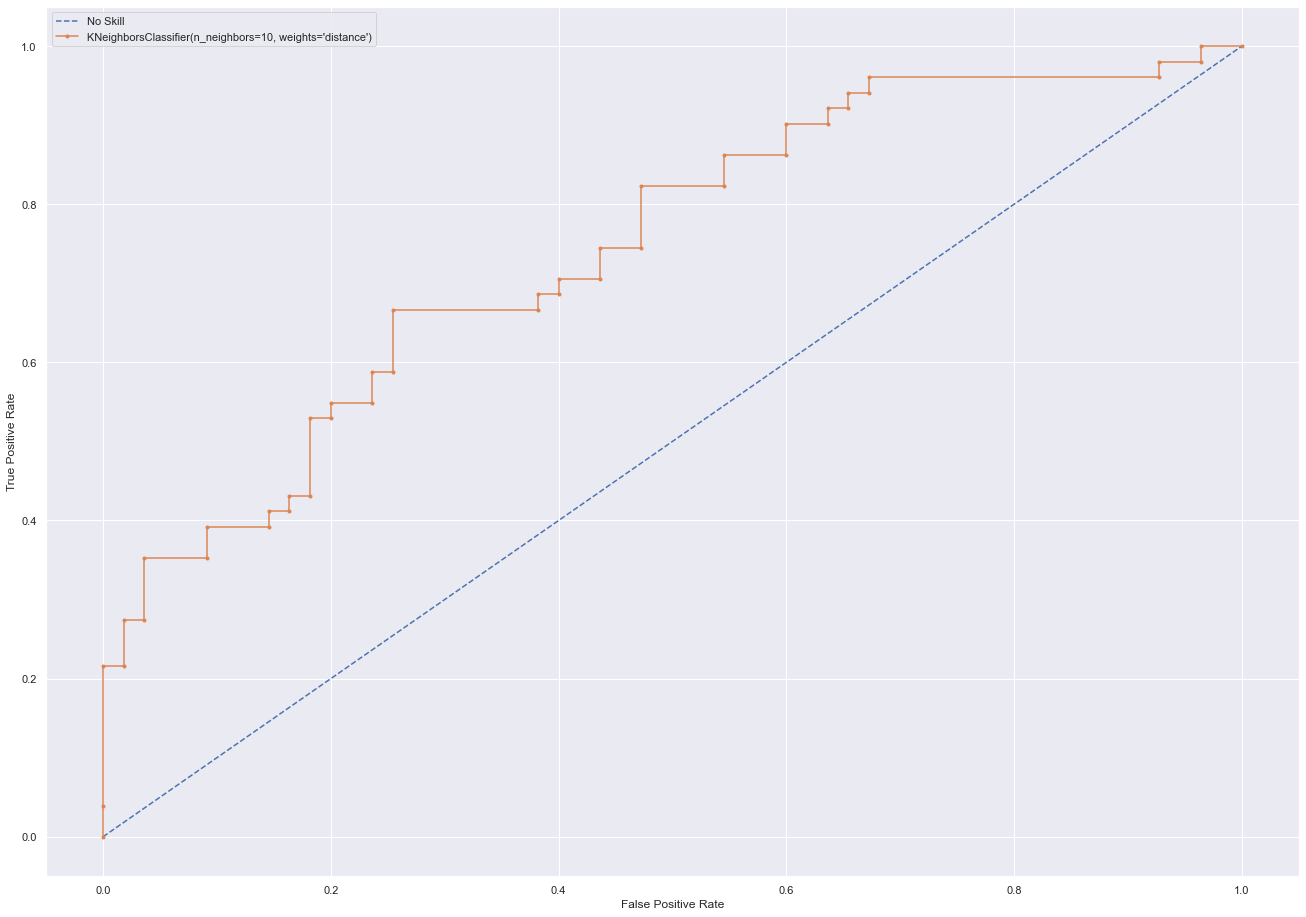

In [147]:
#Test KNN model
baseline_model_1 = KNN(n_neighbors = 10, weights = 'distance')
fitted_baseline_model_1_1,estimator_auc_1_1 = score_model(estimator = baseline_model_1, 
                                      train_data = (X_train, y_train),
                                      validation_data = (X_validation, y_validation),
                                      cv = 10)

CV model accuracy:  %65.50 +/- %11.11
CV model roc_auc:  %69.78 +/- %11.51
Validation accuracy score: %70.75
Validation ROC_AUC score: %70.53
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%78.841


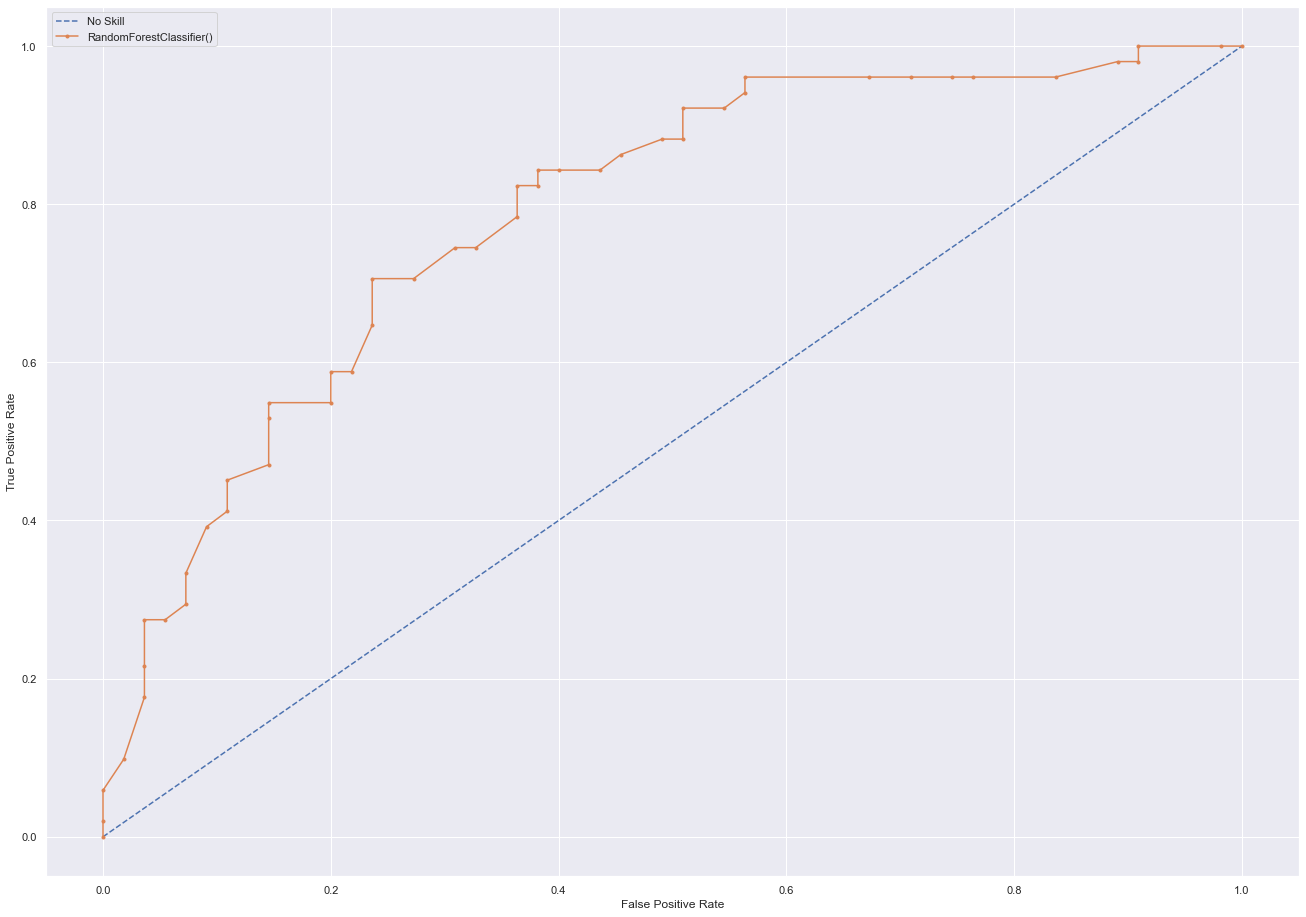

In [148]:
#Test RandomForestClassifier model

baseline_model_2 = RandomForestClassifier()
fitted_baseline_model_1_2, estimator_auc_1_2 = score_model(estimator=baseline_model_2,
                                      train_data = (X_train, y_train),
                                      validation_data = (X_validation, y_validation),
                                      cv = 10)


<AxesSubplot:>

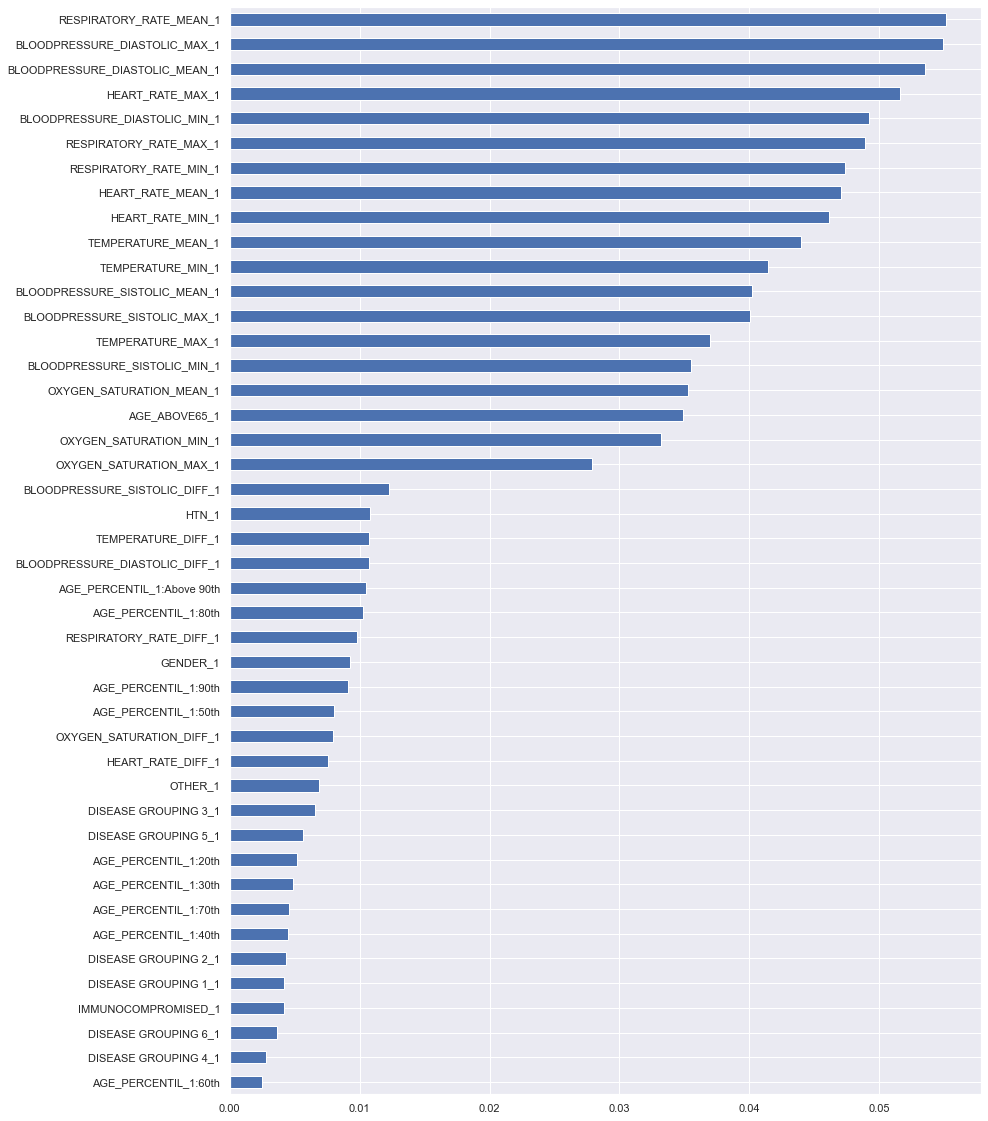

In [149]:
# Plot feature importances for the Random Forest Model

feat_importances = pd.Series(data = fitted_baseline_model_1_2.feature_importances_,
                            index = feature_cols).sort_values()
feat_importances.plot(kind = "barh", figsize = (12,20))

CV model accuracy:  %63.90 +/- %8.44
CV model roc_auc:  %68.52 +/- %10.33
Validation accuracy score: %69.81
Validation ROC_AUC score: %69.55
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%78.752


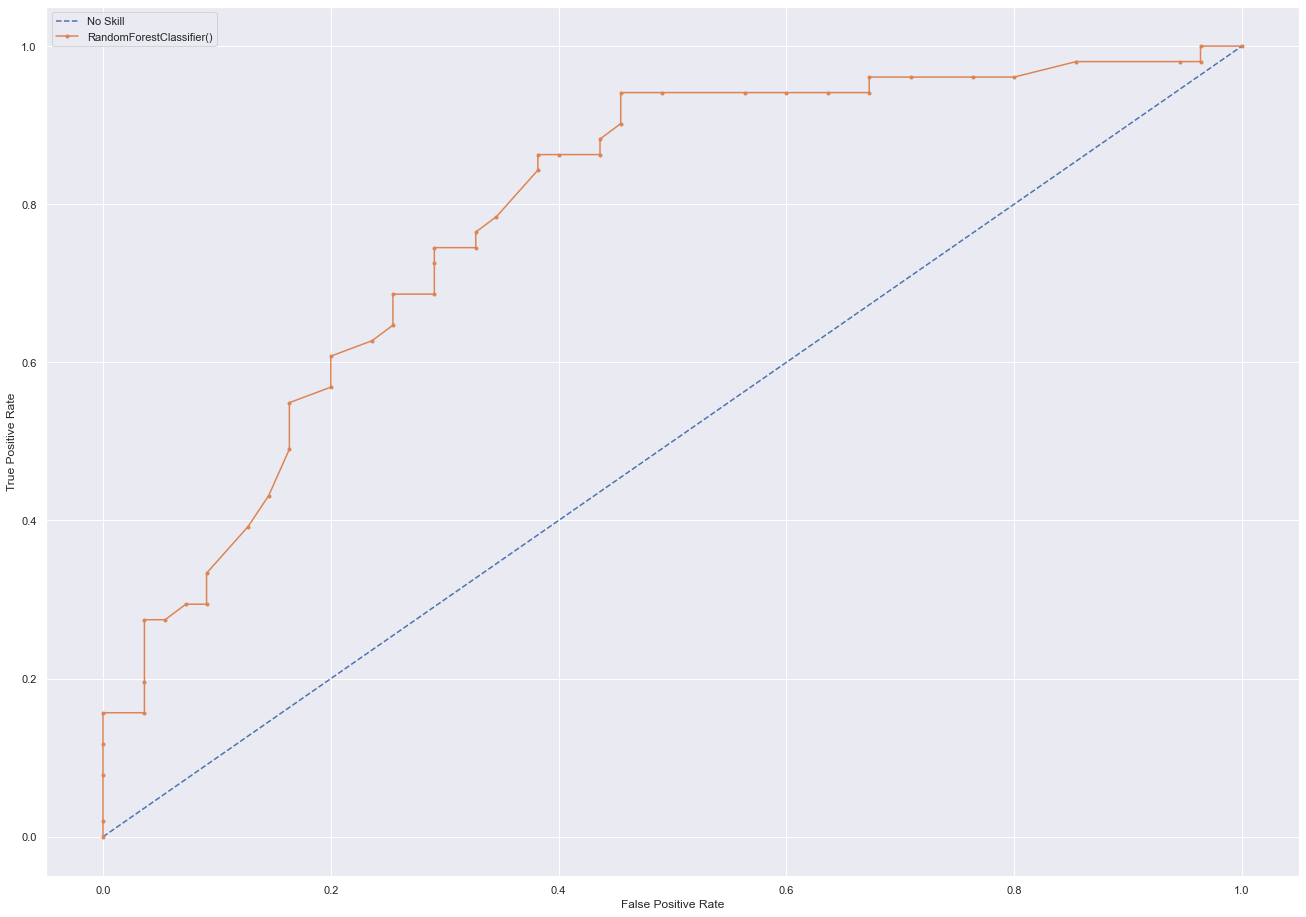

In [150]:
#Test RandomForest model for reduced dataset
ncols_to_keep = int(0.8 * len(feat_importances))
reduced_feat_columns = feat_importances.nlargest(n = ncols_to_keep).index

reduced_x_train = X_train[reduced_feat_columns]
reduced_x_validation = X_validation[reduced_feat_columns]

fitted_baseline_model_1_3, estimator_auc_1_3 = score_model(estimator=baseline_model_2,
                                      train_data = (reduced_x_train, y_train),
                                      validation_data = (reduced_x_validation, y_validation),
                                      cv = 10)


In [151]:
#Get RFE feature ranking and compare to RandomForestClassifier feature importance
rfe_model = RandomForestClassifier(n_estimators = 10)
feature_selector = RFE(estimator = rfe_model, step = 1)
feature_selector.fit(X_train, y_train)
feature_ranking = pd.Series(data = feature_selector.ranking_, index = feature_cols).sort_values()

importance_scale = pd.concat([feature_ranking, feat_importances.rank(ascending = False)], axis = 1)
importance_scale = importance_scale.rename(columns = {0: 'RFE_ranking', 1: 'RFC_ranking'})
importance_scale.sort_values(by = ['RFE_ranking', 'RFC_ranking'])

,RFE_ranking,RFC_ranking
RESPIRATORY_RATE_MEAN_1,1,1.0
BLOODPRESSURE_DIASTOLIC_MAX_1,1,2.0
BLOODPRESSURE_DIASTOLIC_MEAN_1,1,3.0
HEART_RATE_MAX_1,1,4.0
BLOODPRESSURE_DIASTOLIC_MIN_1,1,5.0
RESPIRATORY_RATE_MAX_1,1,6.0
RESPIRATORY_RATE_MIN_1,1,7.0
HEART_RATE_MEAN_1,1,8.0
HEART_RATE_MIN_1,1,9.0
TEMPERATURE_MEAN_1,1,10.0


In [152]:
# Define hyperparameter space
hyperparameter_grid = {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2', None]
}

In [153]:
# Perform hyperparameter tuning by grid searching the defined space
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameter_grid,
                           scoring = "roc_auc",
                           cv = 10,
                           n_jobs = 4,
                           verbose = 1)

grid_search_results = grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'n_estimators': 100}
Validation accuracy: %69.81
Validation ROC_AUC: %69.27
-----
No Skill: ROC AUC=%50.000
RandomForestClassifier: ROC AUC=%75.045


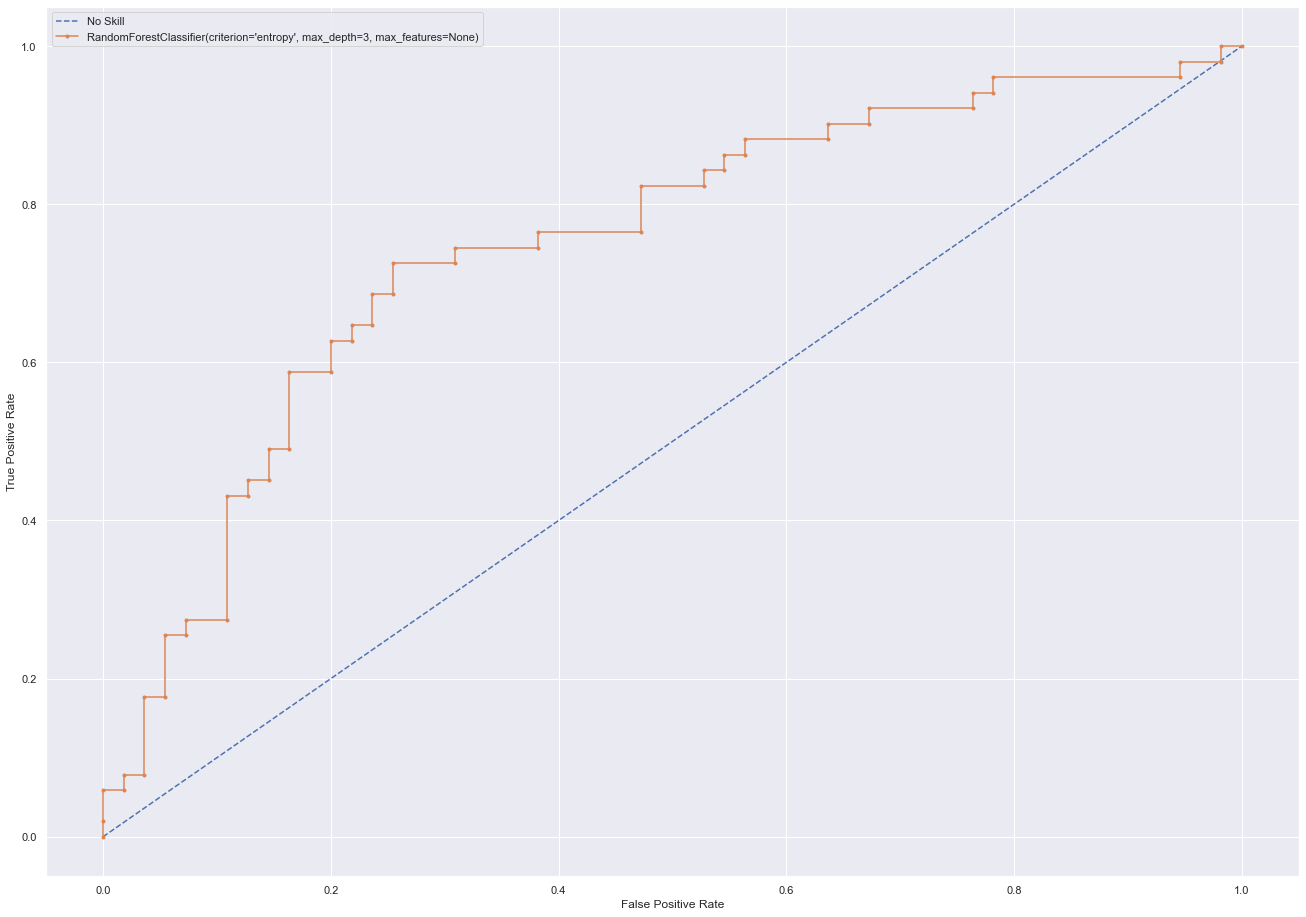

In [154]:
# Look at the best performing set of hyperparameters and apply estimator on valdiation data
print(grid_search.best_params_)

best_gridsearch_model = grid_search.best_estimator_
best_gridsearch_model.fit(X_train, y_train)
y_pred = best_gridsearch_model.predict(X_validation)

print("Validation accuracy: %{:.2f}".format((accuracy_score(y_validation, y_pred))*100))
print("Validation ROC_AUC: %{:.2f}".format((roc_auc_score(y_validation, y_pred))*100))

# Generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(y_validation))]

# predict probabilities
best_gridsearch_model_probs = best_gridsearch_model.predict_proba(X_validation)

# keep probabilities for the positive outcome only
best_gridsearch_model_probs = best_gridsearch_model_probs[:,1]

# calculate scores
no_skill_auc_1 = roc_auc_score(y_validation, no_skill_probs)
best_gridsearch_model_auc_1 = roc_auc_score(y_validation, best_gridsearch_model_probs)

print("-----")

# summarize scores
print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc_1)*100))
print('RandomForestClassifier: ROC AUC=%{:.3f}'.format((best_gridsearch_model_auc_1)*100))

# calculate roc curves
no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
best_gridsearch_model_fpr, best_gridsearch_model_tpr, _ = roc_curve(y_validation, best_gridsearch_model_probs)

# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
plt.plot(best_gridsearch_model_fpr, best_gridsearch_model_tpr, marker='.', label=best_gridsearch_model)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()


In [155]:
import os
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


import lightgbm as lgb



from sklearn.metrics import mean_squared_error as MSE

from lightgbm import LGBMRegressor

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor #sklearn xgboost



from sklearn.model_selection import KFold, cross_val_score, train_test_split
import sklearn
from sklearn.model_selection import GridSearchCV



from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC,LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from sklearn.neural_network import MLPRegressor
from tpot import TPOTRegressor
from catboost import  CatBoostRegressor

In [156]:
# Use model XGBoost, LightGBM,Catboost(parameter tuned),Catboost(origional parameter setting),parameter tuned handly or grid search
RANDOM_SEED=1
xgbr=XGBRegressor(n_estimators=2000, seed=1024, 
                       eta=0.01,min_child_weight=3,max_depth=5,subsample=0.5)
lgbmr=LGBMRegressor(learning_rate = 0.01,n_estimators=1500)
cat=CatBoostRegressor( num_trees=1500,depth=5,l2_leaf_reg=0.01,random_strength=1)
catori=CatBoostRegressor()


#stack of the four above models, meta_model is lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

stack = StackingCVRegressor(regressors=(cat,catori,lgbmr,xgbr),
                            meta_regressor=lasso,
                            random_state=RANDOM_SEED)

In [158]:
predicvalx=stack.predict(X_validation)


In [160]:
y_validation

322    1
347    1
241    0
183    1
224    0
      ..
205    0
169    0
39     1
11     1
328    0
Name: ICU, Length: 106, dtype: int64

In [ ]:
stack.fit(X_train,y_train)#fit by stack model

predicvalx=stack.predict(val_x.values)

#turn predict results to submission form
pred_result=pd.DataFrame(predicvalx, columns = ['target'])#NN 0.1783

pred_result.to_csv('predresult.csv',index_label='Id')

pred_result2 = pd.read_csv('predresult.csv')

pred_result2.Id+=1
pred_result2.to_csv('predresult.csv',index=False)


In [ ]:
X_train, X_validation, y_train, y_validation